In [1]:
import load_data
import preprocess_spectra
import pandas
from importlib import reload
import matplotlib.pyplot as plt
import numpy
import specplotlib
%matplotlib notebook

In [2]:
reload(load_data)
SN_df, SN_spec_df = load_data.load_SN_spec_df()

In [3]:
SN_spec_df.head()

#Filename       MJD  t_from_peak inst_list   SN_name
0  sn1993ac-19931016.49-mmt.flm  49276.49         7.29       mmt  sn1993ac
1  sn1993ac-19931020.52-mmt.flm  49280.52        11.32       mmt  sn1993ac
2  sn1993ae-19931213.11-mmt.flm  49334.11     99999.90       mmt  sn1993ae
3   sn1994D-19940310.36-mmt.flm  49421.36       -11.14       mmt   sn1994D
4  sn1994D-19940311.41-fast.flm  49422.41       -10.09      fast   sn1994D

In [4]:
SN_df.head(20)

zhel  tmax(B)  +/-       ref.  Dm15  +/-.1 ref..1    M_B  +/-.2  \
#SN                                                                         
1993ac  0.0503  49269.2  1.2      Jha07  1.19   0.10  Phi99 -99.99   9.99   
1993ae  0.0190  99999.9  9.9        NaN  9.99   9.99    NaN -99.99   9.99   
1994D   0.0029  49432.5  0.1  B,M,SA,SN  1.37   0.03      B -99.99   9.99   
1994M   0.0232  49474.5  0.9  B,M,SA,SN  1.26   0.06      B -19.21   0.08   
1994Q   0.0295  49496.2  1.1      Jha07  1.03   0.10  Phi99 -99.99   9.99   
1994S   0.0151  49518.3  0.3  B,M,SA,SN  0.94   0.06      B -19.55   0.09   
1994T   0.0346  49514.4  0.4       M,SN  1.51   0.08     SN -99.99   9.99   
1994ae  0.0043  49685.5  0.8  B,M,SA,SN  0.96   0.04      B -99.99   9.99   
1995D   0.0067  49768.7  0.1  B,M,SA,SN  1.05   0.03      B -99.99   9.99   
1995E   0.0120  49775.2  0.5  B,M,SA,SN  1.16   0.05      B -99.99   9.99   
1995Y   0.0177  99999.9  9.9        NaN  9.99   9.99    NaN -99.99   9.99   
1995ac  0.0499  49993.1  0.5  B,M,SA,SN  0.77   0.04      B -19.56   0.07   
1995ak  0.0227  50021.6  1.0  B,M,SA,SN  1.25   0.07      B -19.39   0.10   
1995al  0.0051  50029.1  0.6  B,M,SA,SN  0.87   0.04      B -99.99   9.99   
1995bd  0.0146  50086.5  0.4  B,M,SA,SN  0.94   0.04      B -99.99   9.99   
1996C   0.0270  50128.5  0.3  B,M,SA,SN  0.93   0.06      B -19.47   0.08   
1996V   0.0237  99999.9  9.9        NaN  9.99   9.99    NaN -99.99   9.99   
1996X   0.0068  50191.1  0.3  B,M,SA,SN  1.26   0.04      B -99.99   9.99   
1996Z   0.0074  50217.0  1.1         SA  1.22   0.10  Phi99 -99.99   9.99   
1996ab  0.1230  50223.9  1.8     B,M,SA  1.01   0.07      B -19.44   0.11   

         B-V  +/-.3  Bm-Vm  +/-.4       Phot.  ref..2  n_spec  
#SN                                                            
1993ac -9.99   9.99  -9.99   9.99        CfA1     NaN     2.0  
1993ae -9.99   9.99  -9.99   9.99        CfA1     NaN     1.0  
1994D  -9.99   9.99  -9.99   9.99       Jha07     NaN    26.0  
1994M  -0.11   0.06  -0.10   0.06        CfA1     NaN     9.0  
1994Q  -9.99   9.99  -9.99   9.99        CfA1     NaN     4.0  
1994S  -0.12   0.05  -0.11   0.05        CfA1     NaN     4.0  
1994T  -9.99   9.99  -9.99   9.99        CfA1     NaN     5.0  
1994ae -9.99   9.99  -9.99   9.99  CfA1,Jha07     NaN    18.0  
1995D  -9.99   9.99  -9.99   9.99  CfA1,Jha07     NaN    14.0  
1995E  -9.99   9.99  -9.99   9.99        CfA1     NaN     7.0  
1995Y  -9.99   9.99  -9.99   9.99         NaN     NaN     4.0  
1995ac -0.13   0.05  -0.05   0.05  CfA1,Jha07     NaN     4.0  
1995ak -0.13   0.07  -0.12   0.07        CfA1     NaN     6.0  
1995al -9.99   9.99  -9.99   9.99        CfA1     NaN    13.0  
1995bd -9.99   9.99  -9.99   9.99        CfA1     NaN     9.0  
1996C  -0.12   0.06  -0.11   0.05        CfA1     NaN     3.0  
1996V  -9.99   9.99  -9.99   9.99         NaN     NaN     1.0  
1996X  -9.99   9.99  -9.99   9.99  CfA1,Jha07     NaN    15.0  
1996Z  -9.99   9.99  -9.99   9.99        CfA1     NaN     6.0  
1996ab -0.14   0.06  -0.13   0.06        CfA1     NaN     1.0

In [391]:
from astroquery.simbad import Simbad
from astropy import units as u
from astropy.coordinates import SkyCoord
import time

nof_objects = SN_df.shape[0]
#ra_arr = numpy.zeros(nof_objects)
#dec_arr = numpy.zeros(nof_objects)

for idx, name in enumerate(SN_df.index):
    if numpy.isnan(ra_arr[idx]):
        try:
            sn = 'sn' + name
            result_table = Simbad.query_object(sn)
            ra, dec = result_table['RA'], result_table['DEC']
            c = SkyCoord(ra = ra[0], dec = dec[0],unit=(u.hourangle, u.deg), frame='icrs')
            ra, dec = c.ra.value, c.dec.value
        except:
            try:
                print('Sleeping', sn)
                time.sleep(5)
                result_table = Simbad.query_object(sn)
                ra, dec = result_table['RA'], result_table['DEC']
                c = SkyCoord(ra = ra[0], dec = dec[0],unit=(u.hourangle, u.deg), frame='icrs')
                ra, dec = c.ra.value, c.dec.value
            except:
                ra, dec = numpy.nan, numpy.nan
                print('Did not find SN ', sn)
        ra_arr[idx] = ra
        dec_arr[idx] = dec


Sleeping sn2003eh
Did not find SN  sn2003eh
Sleeping sn2003ek
Did not find SN  sn2003ek
Sleeping sn2003ep
Did not find SN  sn2003ep
Sleeping sn2003ez
Did not find SN  sn2003ez
Sleeping sn2003fa
Did not find SN  sn2003fa
Sleeping sn2003fd
Did not find SN  sn2003fd
Sleeping sn2003ge
Did not find SN  sn2003ge
Sleeping sn2003gj
Did not find SN  sn2003gj
Sleeping sn2003gn
Did not find SN  sn2003gn
Sleeping sn2003gq
Did not find SN  sn2003gq
Sleeping sn2003hm
Did not find SN  sn2003hm
Sleeping sn2003hu
Did not find SN  sn2003hu
Sleeping sn2003hv
Did not find SN  sn2003hv
Sleeping sn2003hw
Did not find SN  sn2003hw
Sleeping sn2003hx
Did not find SN  sn2003hx
Sleeping sn2003hz
Did not find SN  sn2003hz
Sleeping sn2003ia
Did not find SN  sn2003ia
Sleeping sn2003ic
Did not find SN  sn2003ic
Sleeping sn2003if
Did not find SN  sn2003if
Sleeping sn2003im
Did not find SN  sn2003im
Sleeping sn2003in
Did not find SN  sn2003in
Sleeping sn2003it
Did not find SN  sn2003it
Sleeping sn2003iu
Did not find S

In [384]:
name_list = ['sn' + n for n in SN_df.index]
#result_table = Simbad.query_object(name_list)
#result_table

/Users/itamar/anaconda2/envs/avocado/lib/python3.5/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '
  (error.line, error.msg))


In [390]:
sn = 'sn2002bw'
result_table = Simbad.query_object(sn)
result_table

<Table masked=True length=1>
 MAIN_ID       RA         DEC     ... COO_WAVELENGTH     COO_BIBCODE    
            "h:m:s"     "d:m:s"   ...                                   
  object     str13       str13    ...      str1             object      
--------- ----------- ----------- ... -------------- -------------------
SN 2002bw 17 16 35.60 -10 20 31.8 ...                2002IAUC.7864....2L

In [378]:
c = SkyCoord(ra = ra[0], dec = dec[0],unit=(u.hourangle, u.deg), frame='icrs')
c.ra.value, c.dec.value

(230.28479166666662, 27.92688888888889)

<IPython.core.display.Javascript object>


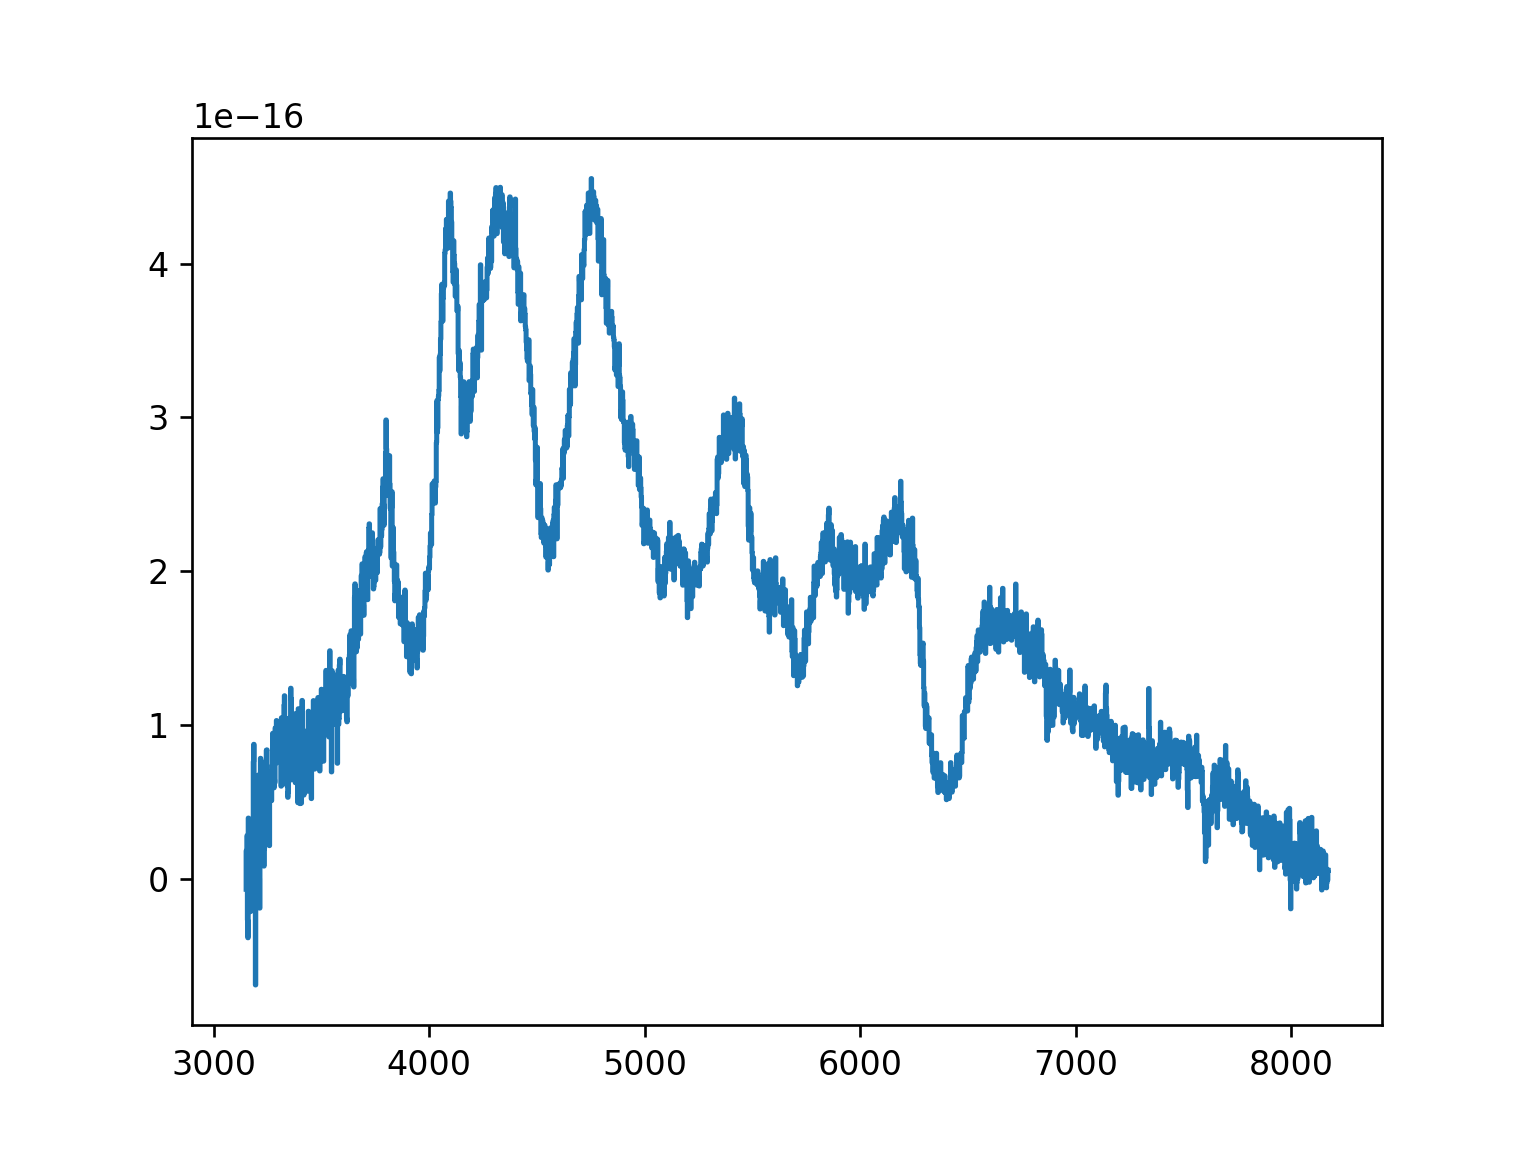

In [5]:
reload(load_data)

filename_list = SN_spec_df['#Filename'].values
idx = 0#idx+1
w,s,ds = load_data.load_single_spectrum(filename_list[idx])
plt.figure()
plt.step(w,s)
plt.show()

In [6]:
#plt.figure()
#plt.hist(SN_spec_df['t_from_peak'], range = [-7,10],bins = 20)
#plt.show()

In [7]:
print(((numpy.array(SN_spec_df['t_from_peak']) > -7) & (numpy.array(SN_spec_df['t_from_peak']) < 10)).sum())
numpy.unique(numpy.array(SN_spec_df['SN_name'])[numpy.where((numpy.array(SN_spec_df['t_from_peak']) > -7) 
                                                & (numpy.array(SN_spec_df['t_from_peak']) < 10))[0]]).shape

948


(240,)

In [8]:
SN_df['n_spec'].iloc[numpy.argsort(SN_df['n_spec'].values)[::-1][:15]]

#SN
SNF20080720-001     NaN
SNF20080522-000     NaN
SNF20080514-002     NaN
SNF20080623-001     NaN
SNF20080522-011     NaN
2001V              38.0
2002bo             36.0
1998bu             33.0
2007af             32.0
1998aq             29.0
1999aa             28.0
2005cf             27.0
2007le             27.0
2003kf             26.0
1994D              26.0
Name: n_spec, dtype: float64

<IPython.core.display.Javascript object>


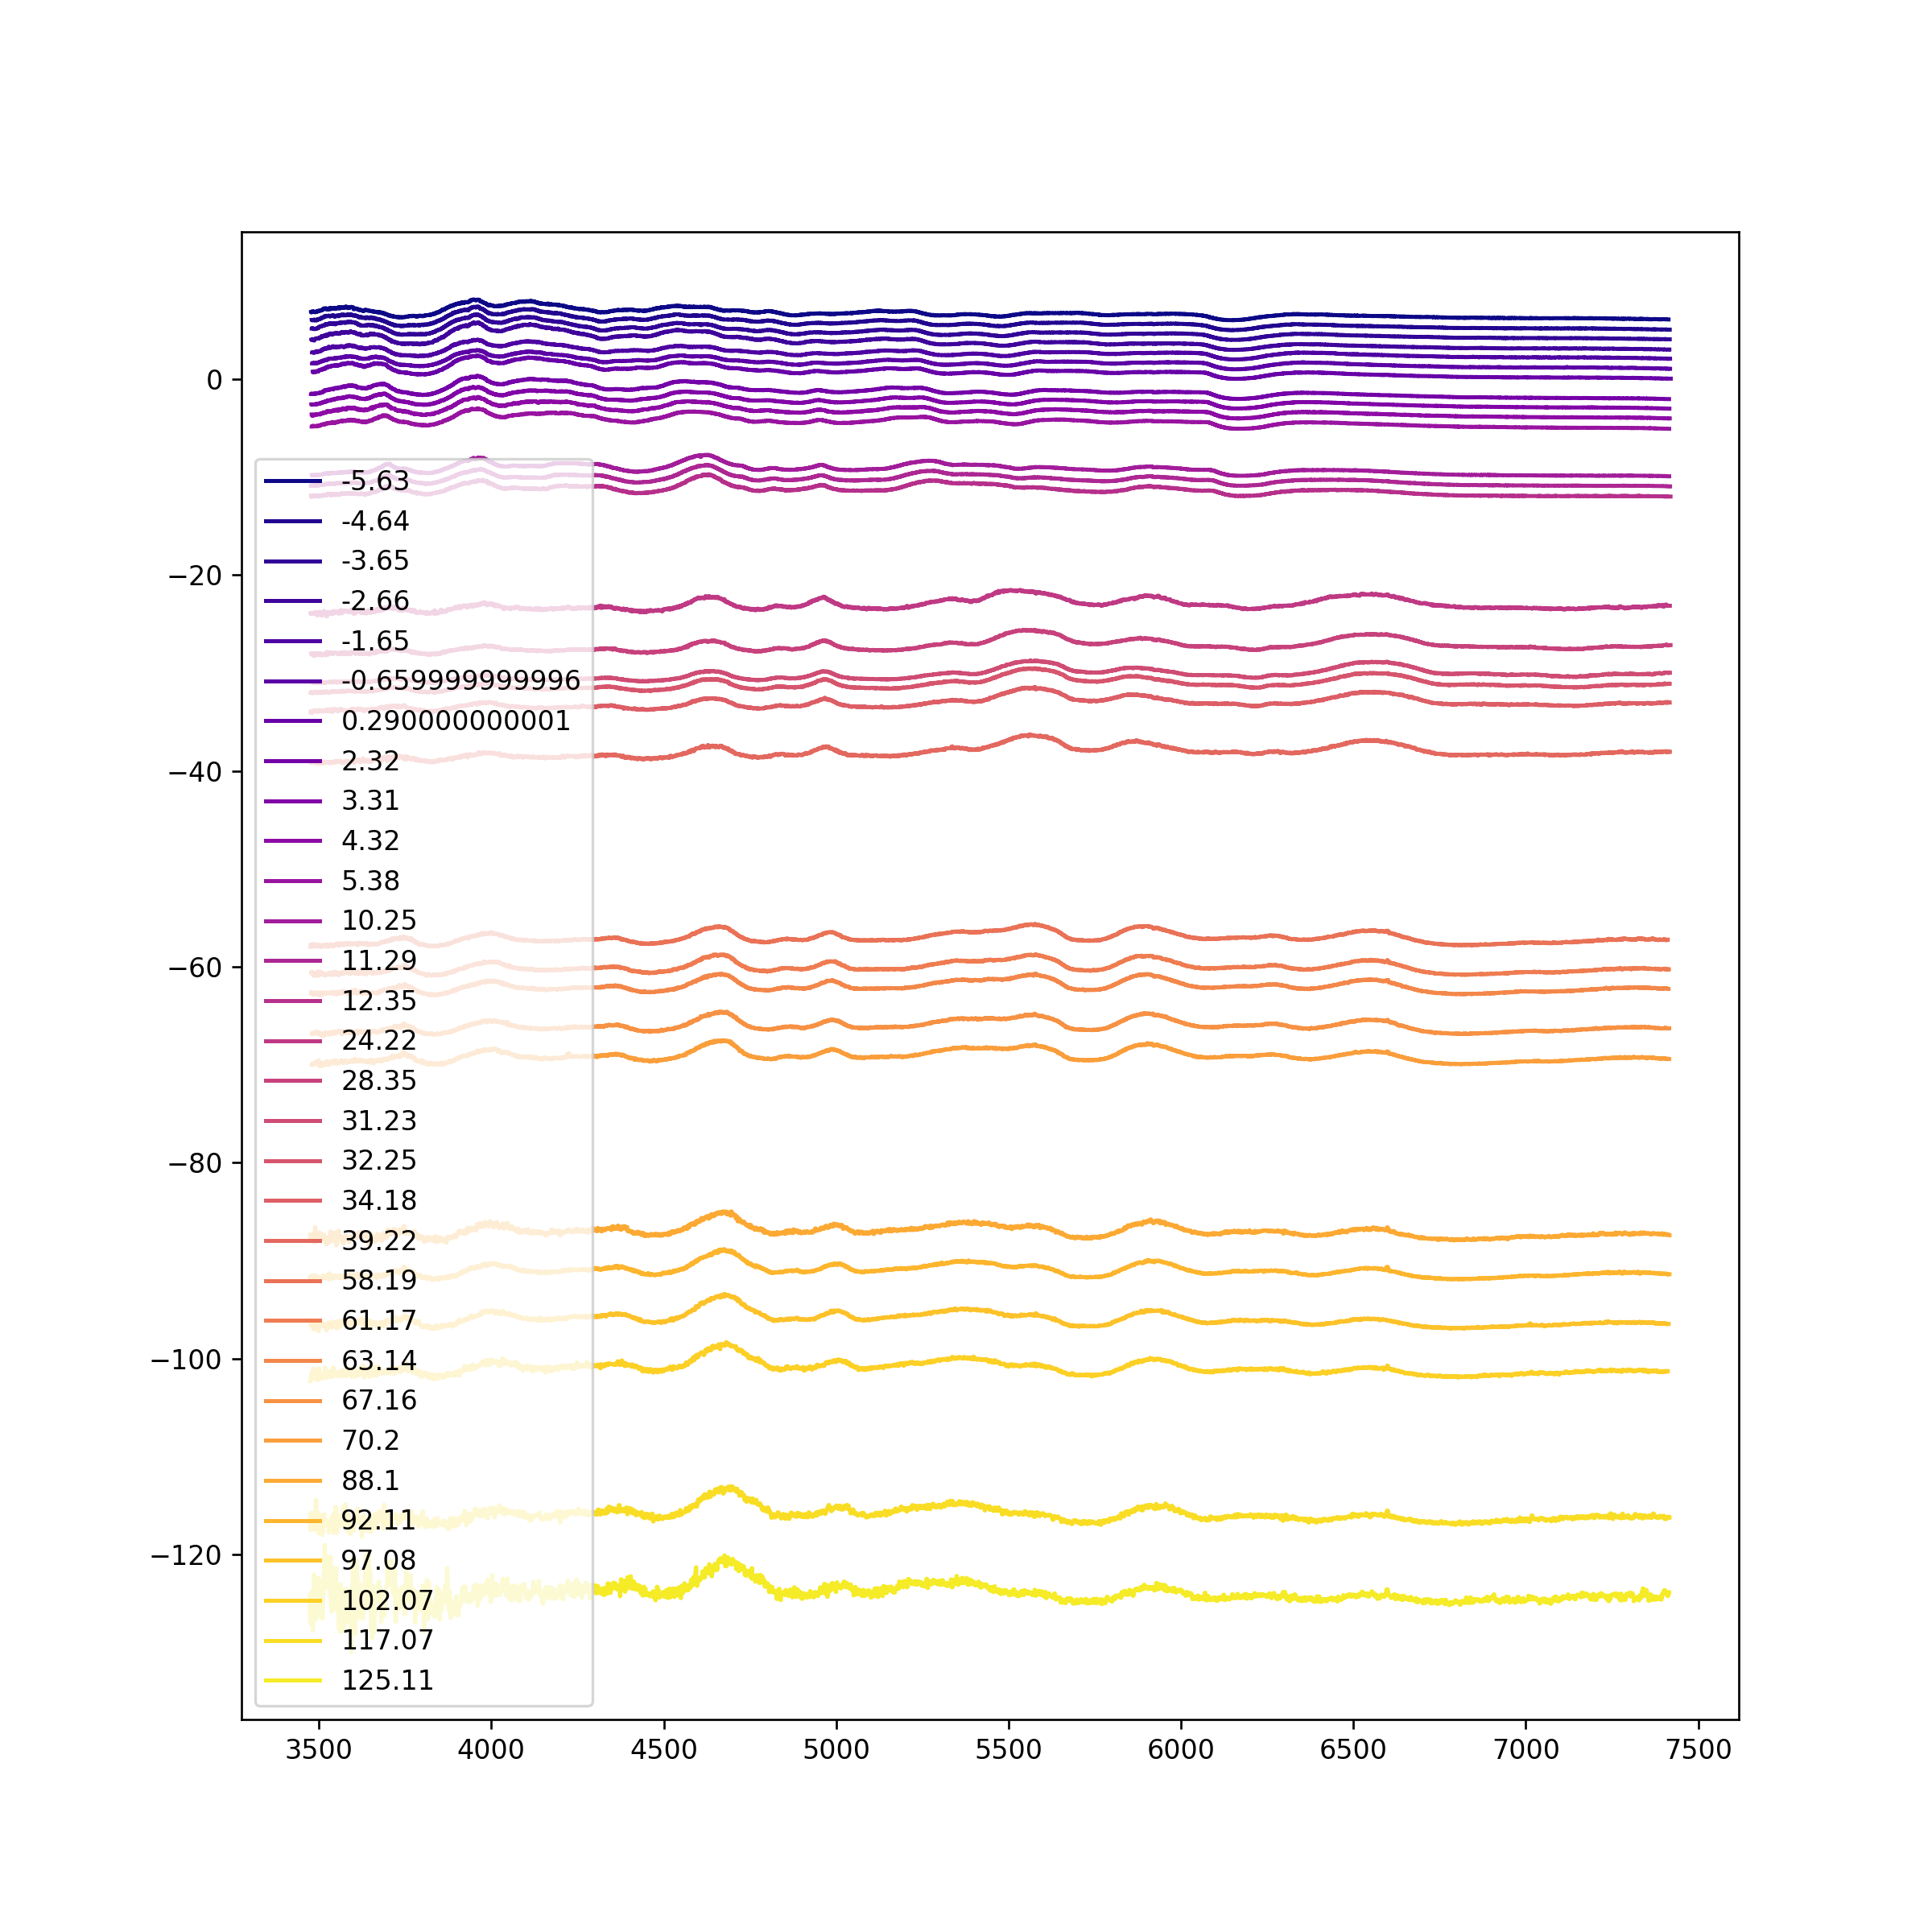

In [9]:
sn_spec_idx = SN_spec_df[SN_spec_df['SN_name'] == 'sn' + '2007af'].index
reload(load_data)
import matplotlib
current_cmap = matplotlib.cm.get_cmap('plasma')

filename_list = SN_spec_df['#Filename'].values
plt.figure(figsize=(10,10))
c = 0
imin = sn_spec_idx.min()
imax = sn_spec_idx.max()
n_spec = imax - imin
for idx in range(imin,imax):
    w,s,ds = load_data.load_single_spectrum(filename_list[idx], )
    s = s / numpy.nanmedian(s)
    plt.step(w,s-SN_spec_df['t_from_peak'].loc[idx],label = SN_spec_df['t_from_peak'].loc[idx],c=current_cmap(abs(c)/n_spec))
    c = c - 1
plt.legend()
plt.show()

In [10]:
#c=0
#for f in SN_df['Phot.']:
#    if type(f) != str:
#        c = c+1
#        #print(False)
#    else:
#        if not 'CfA' in f:
#            #print(f)
#            c = c+1
            
#c

In [11]:
#wmin = numpy.nanmin(W_z, axis = 1)
#wmax = numpy.nanmax(W_z, axis = 1)
#for i in range(nof_objects):
#    print('{} -- {}'.format('%.2f' % wmin[i], '%.2f' % wmax[i]))

In [12]:
reload(load_data)
X_SG, CW, sn_name, sn_spec_idx, sn_spec_time  = load_data.near_max_spectra_matrix(SN_df, SN_spec_df)

FIXME: No E(B-V), using zeros
FIXME(?): using hard coded wavelength grid
Putting all spectra on the same grid wit min lambda =  3623.92494136 and max lambda =  7459.83189992


In [156]:
nof_objects = X_SG.shape[0]
time_indicies = numpy.argsort(sn_spec_time)
time_indicies[:10], time_indicies[-10:]

(array([ 83, 131, 158, 186, 177,   7,  16,  67, 149,  79]),
 array([ 64, 146, 102, 143,   8, 122, 152,  34,  61,  42]))

In [157]:
indicies = numpy.zeros(nof_objects)
indicies[time_indicies] = numpy.arange(nof_objects).astype(int)

In [158]:
indicies[42]

189.0

<IPython.core.display.Javascript object>


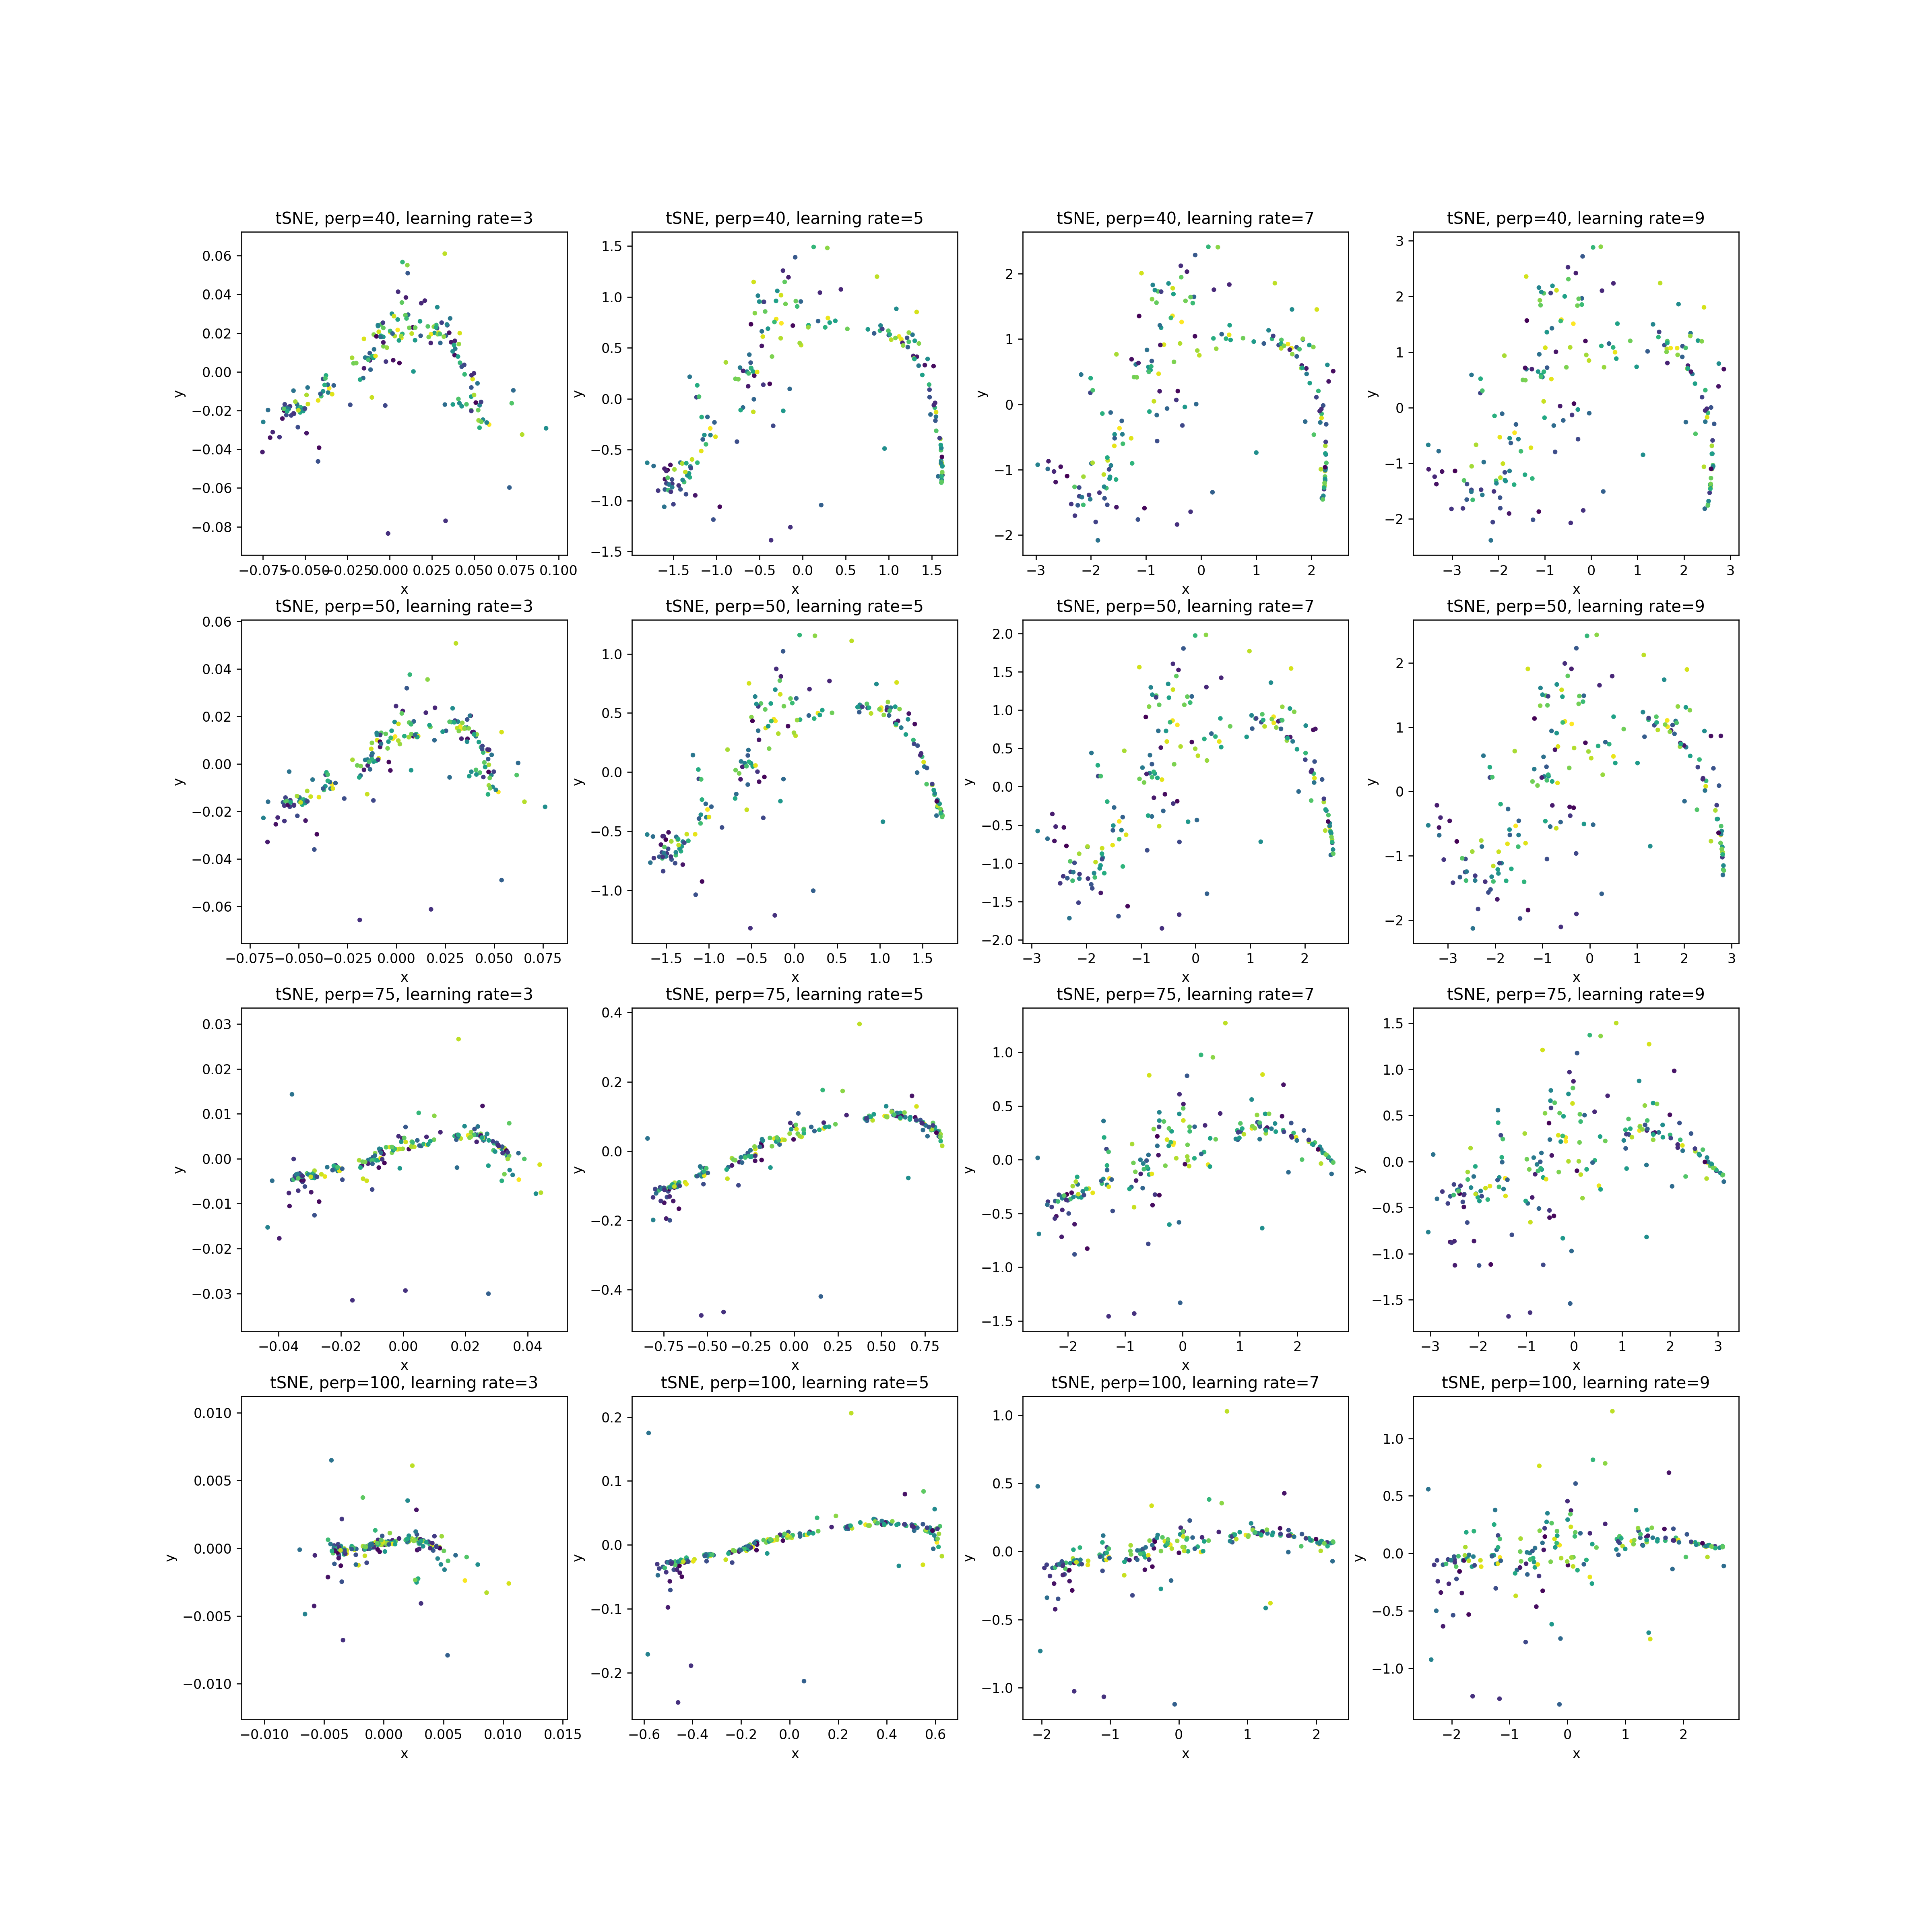

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


In [16]:
# now run the same analysis for different values of perplexity and learning rate
from sklearn.manifold import TSNE

prep_list = [40, 50, 75, 100] #how many "nearest neighbors" to consider 
learning_rate = [3, 5, 7, 9] #which gap to take between calculations of minima (resolution)
plt.rcParams['figure.figsize'] = 20, 20
plt.figure()


count = 1
for p, prep_val in enumerate(prep_list):
    for l, learn_val in enumerate(learning_rate):
        print(p, l)
        
        result = TSNE(perplexity=prep_val, learning_rate=learn_val, metric='euclidean', n_components=2, random_state=1).fit_transform(X_SG)
        x = result[:, 0]
        y = result[:, 1]
        plt.subplot(4, 4, count)
        plt.title("tSNE, perp=%s, learning rate=%s" % (prep_val, learn_val))
        plt.scatter(x, y, c = indicies, s=6)
        plt.xlabel("x")
        plt.ylabel("y")
        
        count += 1
        
#plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


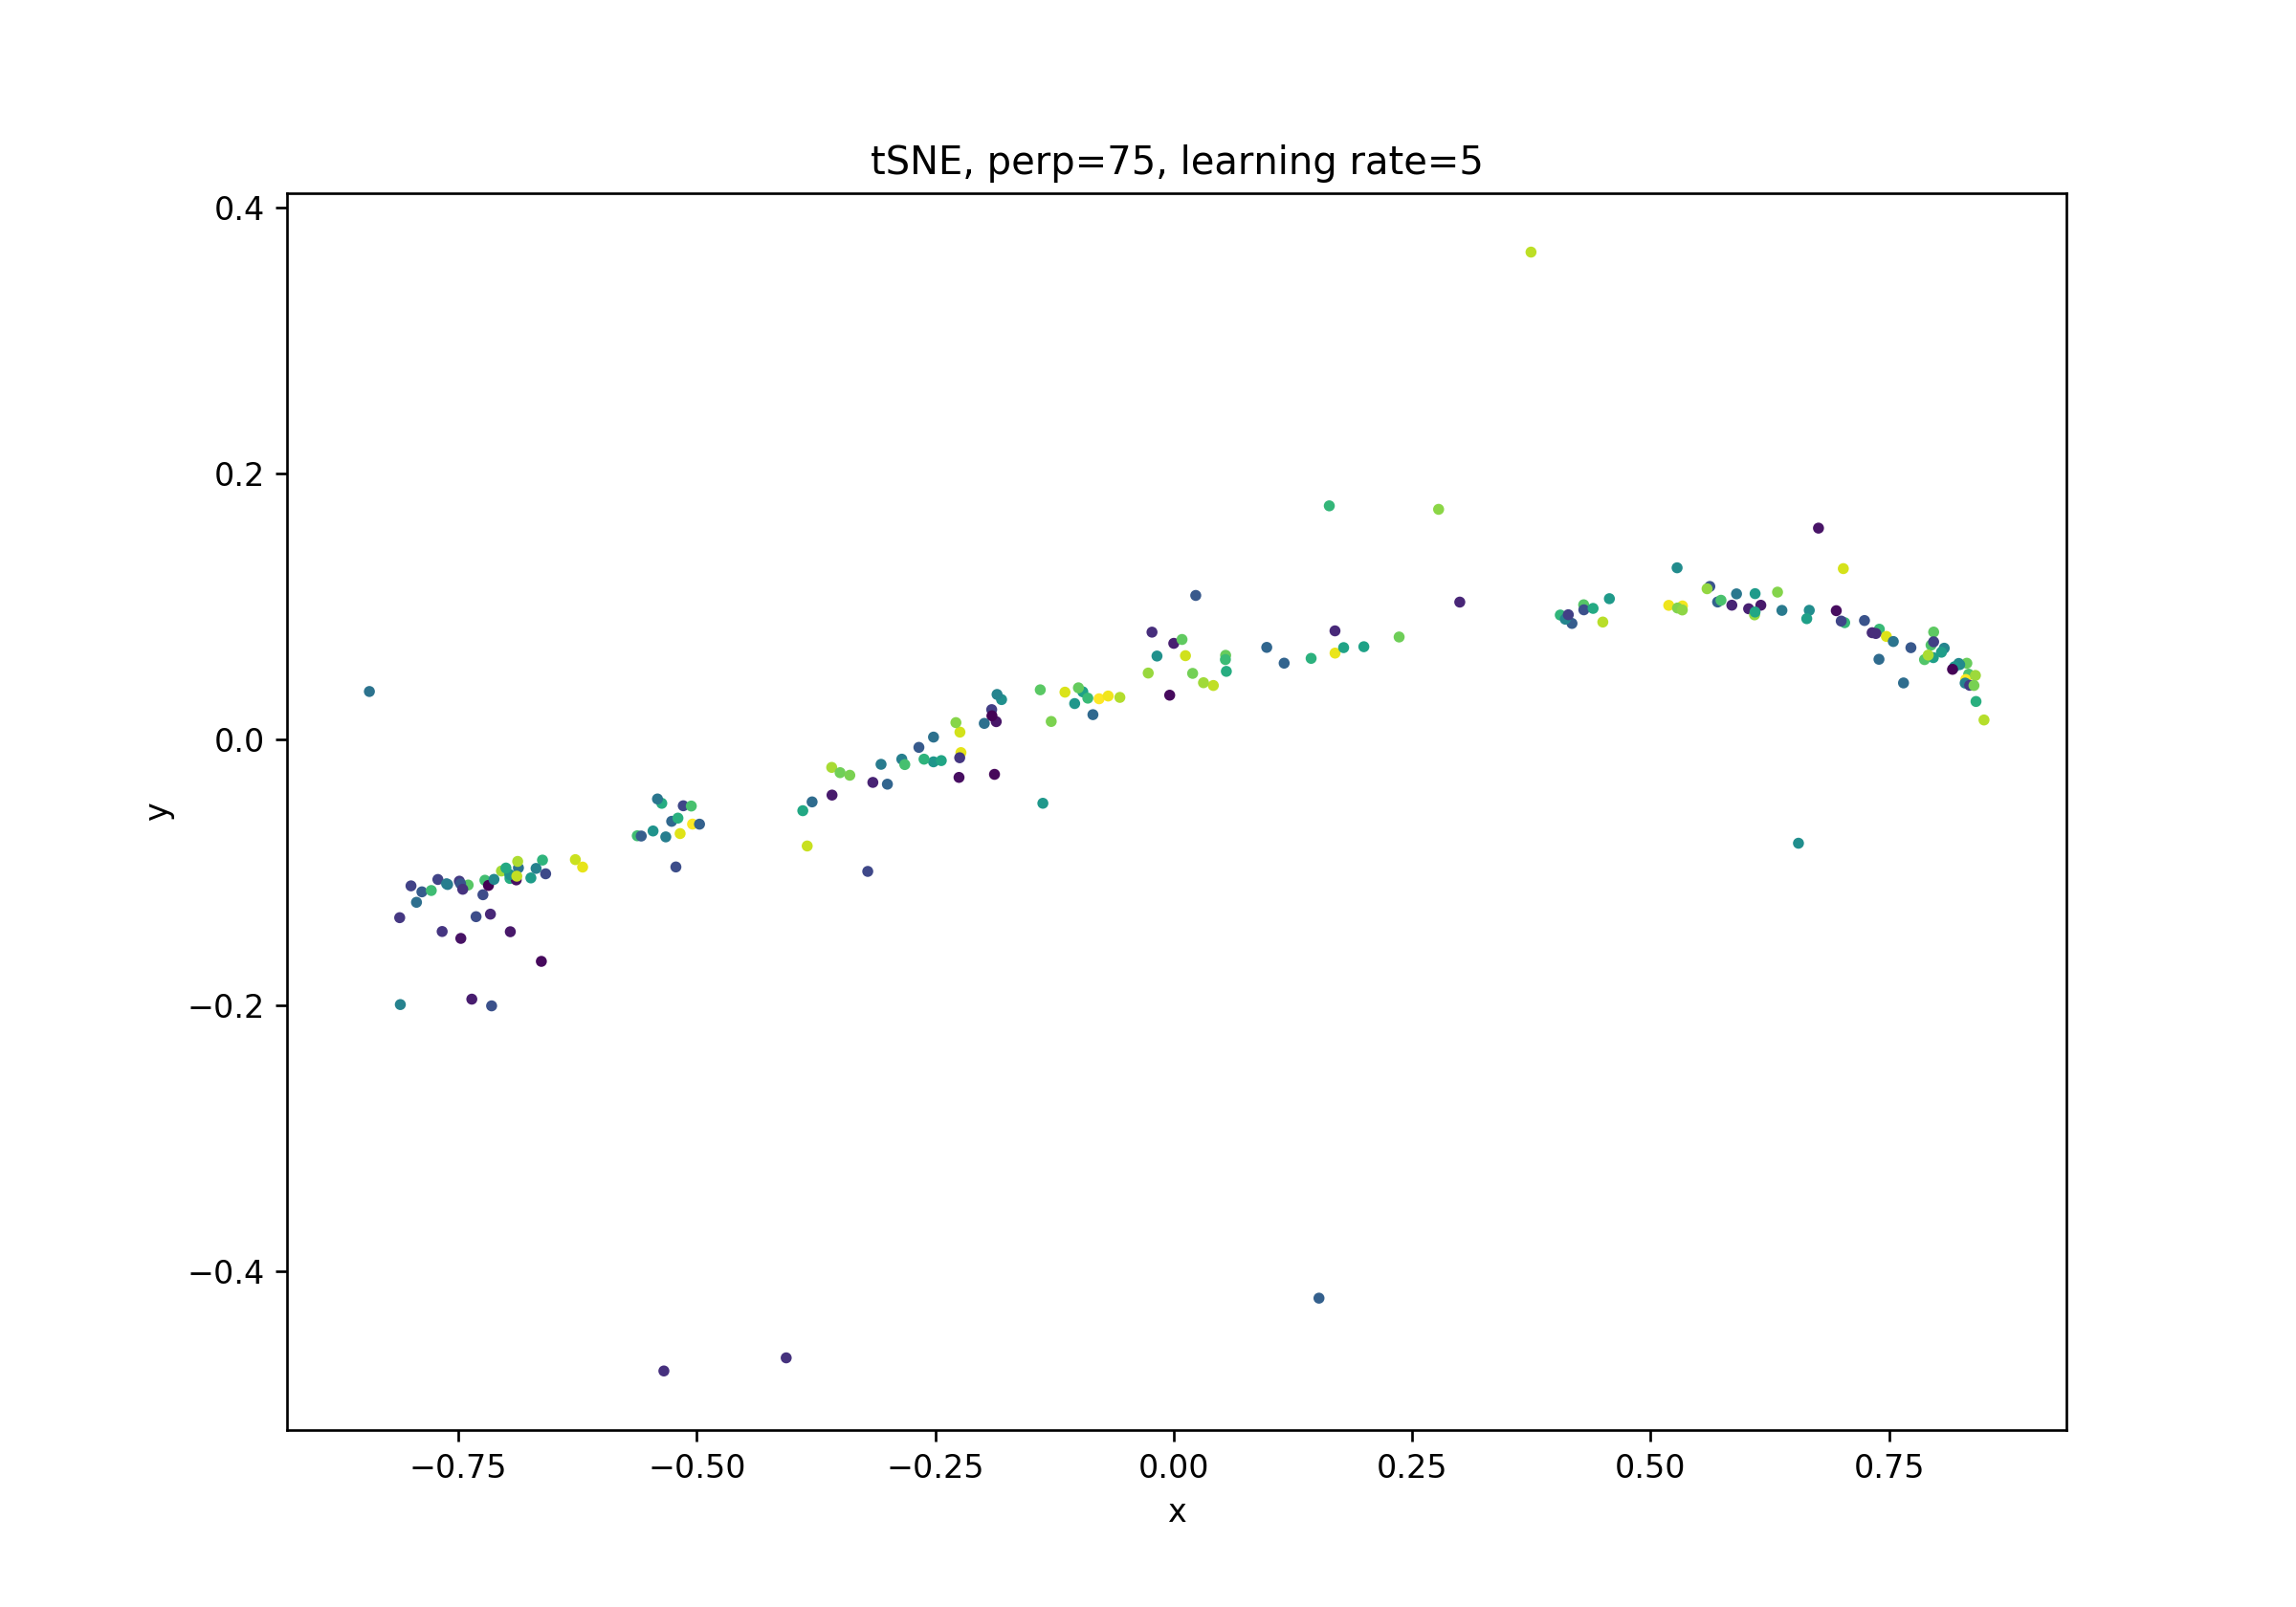

0 0


In [19]:
# now run the same analysis for different values of perplexity and learning rate
from sklearn.manifold import TSNE

prep_list = [75] #how many "nearest neighbors" to consider 
learning_rate = [5] #which gap to take between calculations of minima (resolution)
plt.figure(figsize = (10,7))
#plt.rcParams['figure.figsize'] = 10,7

count = 1
for p, prep_val in enumerate(prep_list):
    for l, learn_val in enumerate(learning_rate):
        print(p, l)
        
        result = TSNE(perplexity=prep_val, learning_rate=learn_val, metric='euclidean', n_components=2, random_state=1).fit_transform(X_SG)
        x = result[:, 0]
        y = result[:, 1]
        plt.subplot(1, 1, count)
        plt.title("tSNE, perp=%s, learning rate=%s" % (prep_val, learn_val))
        plt.scatter(x, y, c = indicies, s=6)
        plt.xlabel("x")
        plt.ylabel("y")
        
        count += 1
        
#plt.tight_layout()
plt.show()

In [20]:
#g1 = numpy.where((x > 0.5))[0]# & (y > 0.3))[0]
#g2 = numpy.where((x < -0.5))[0]# & (x < 0.15))[0]
#g3 = numpy.where((x < -0.12) )[0]

In [32]:
reload(load_data)

<module 'load_data' from '/Users/itamar/git/astro/SNIa/load_data.py'>

In [35]:
lc_df = load_data.load_lc_df()
lc_df.head()

TypeError: concat() got an unexpected keyword argument 'sort'

190

In [ ]:
value = numpy.zeros(len(sn_name))
for n_idx, n in enumerate(sn_name):
    if n in lc_df.index:
        value

<IPython.core.display.Javascript object>


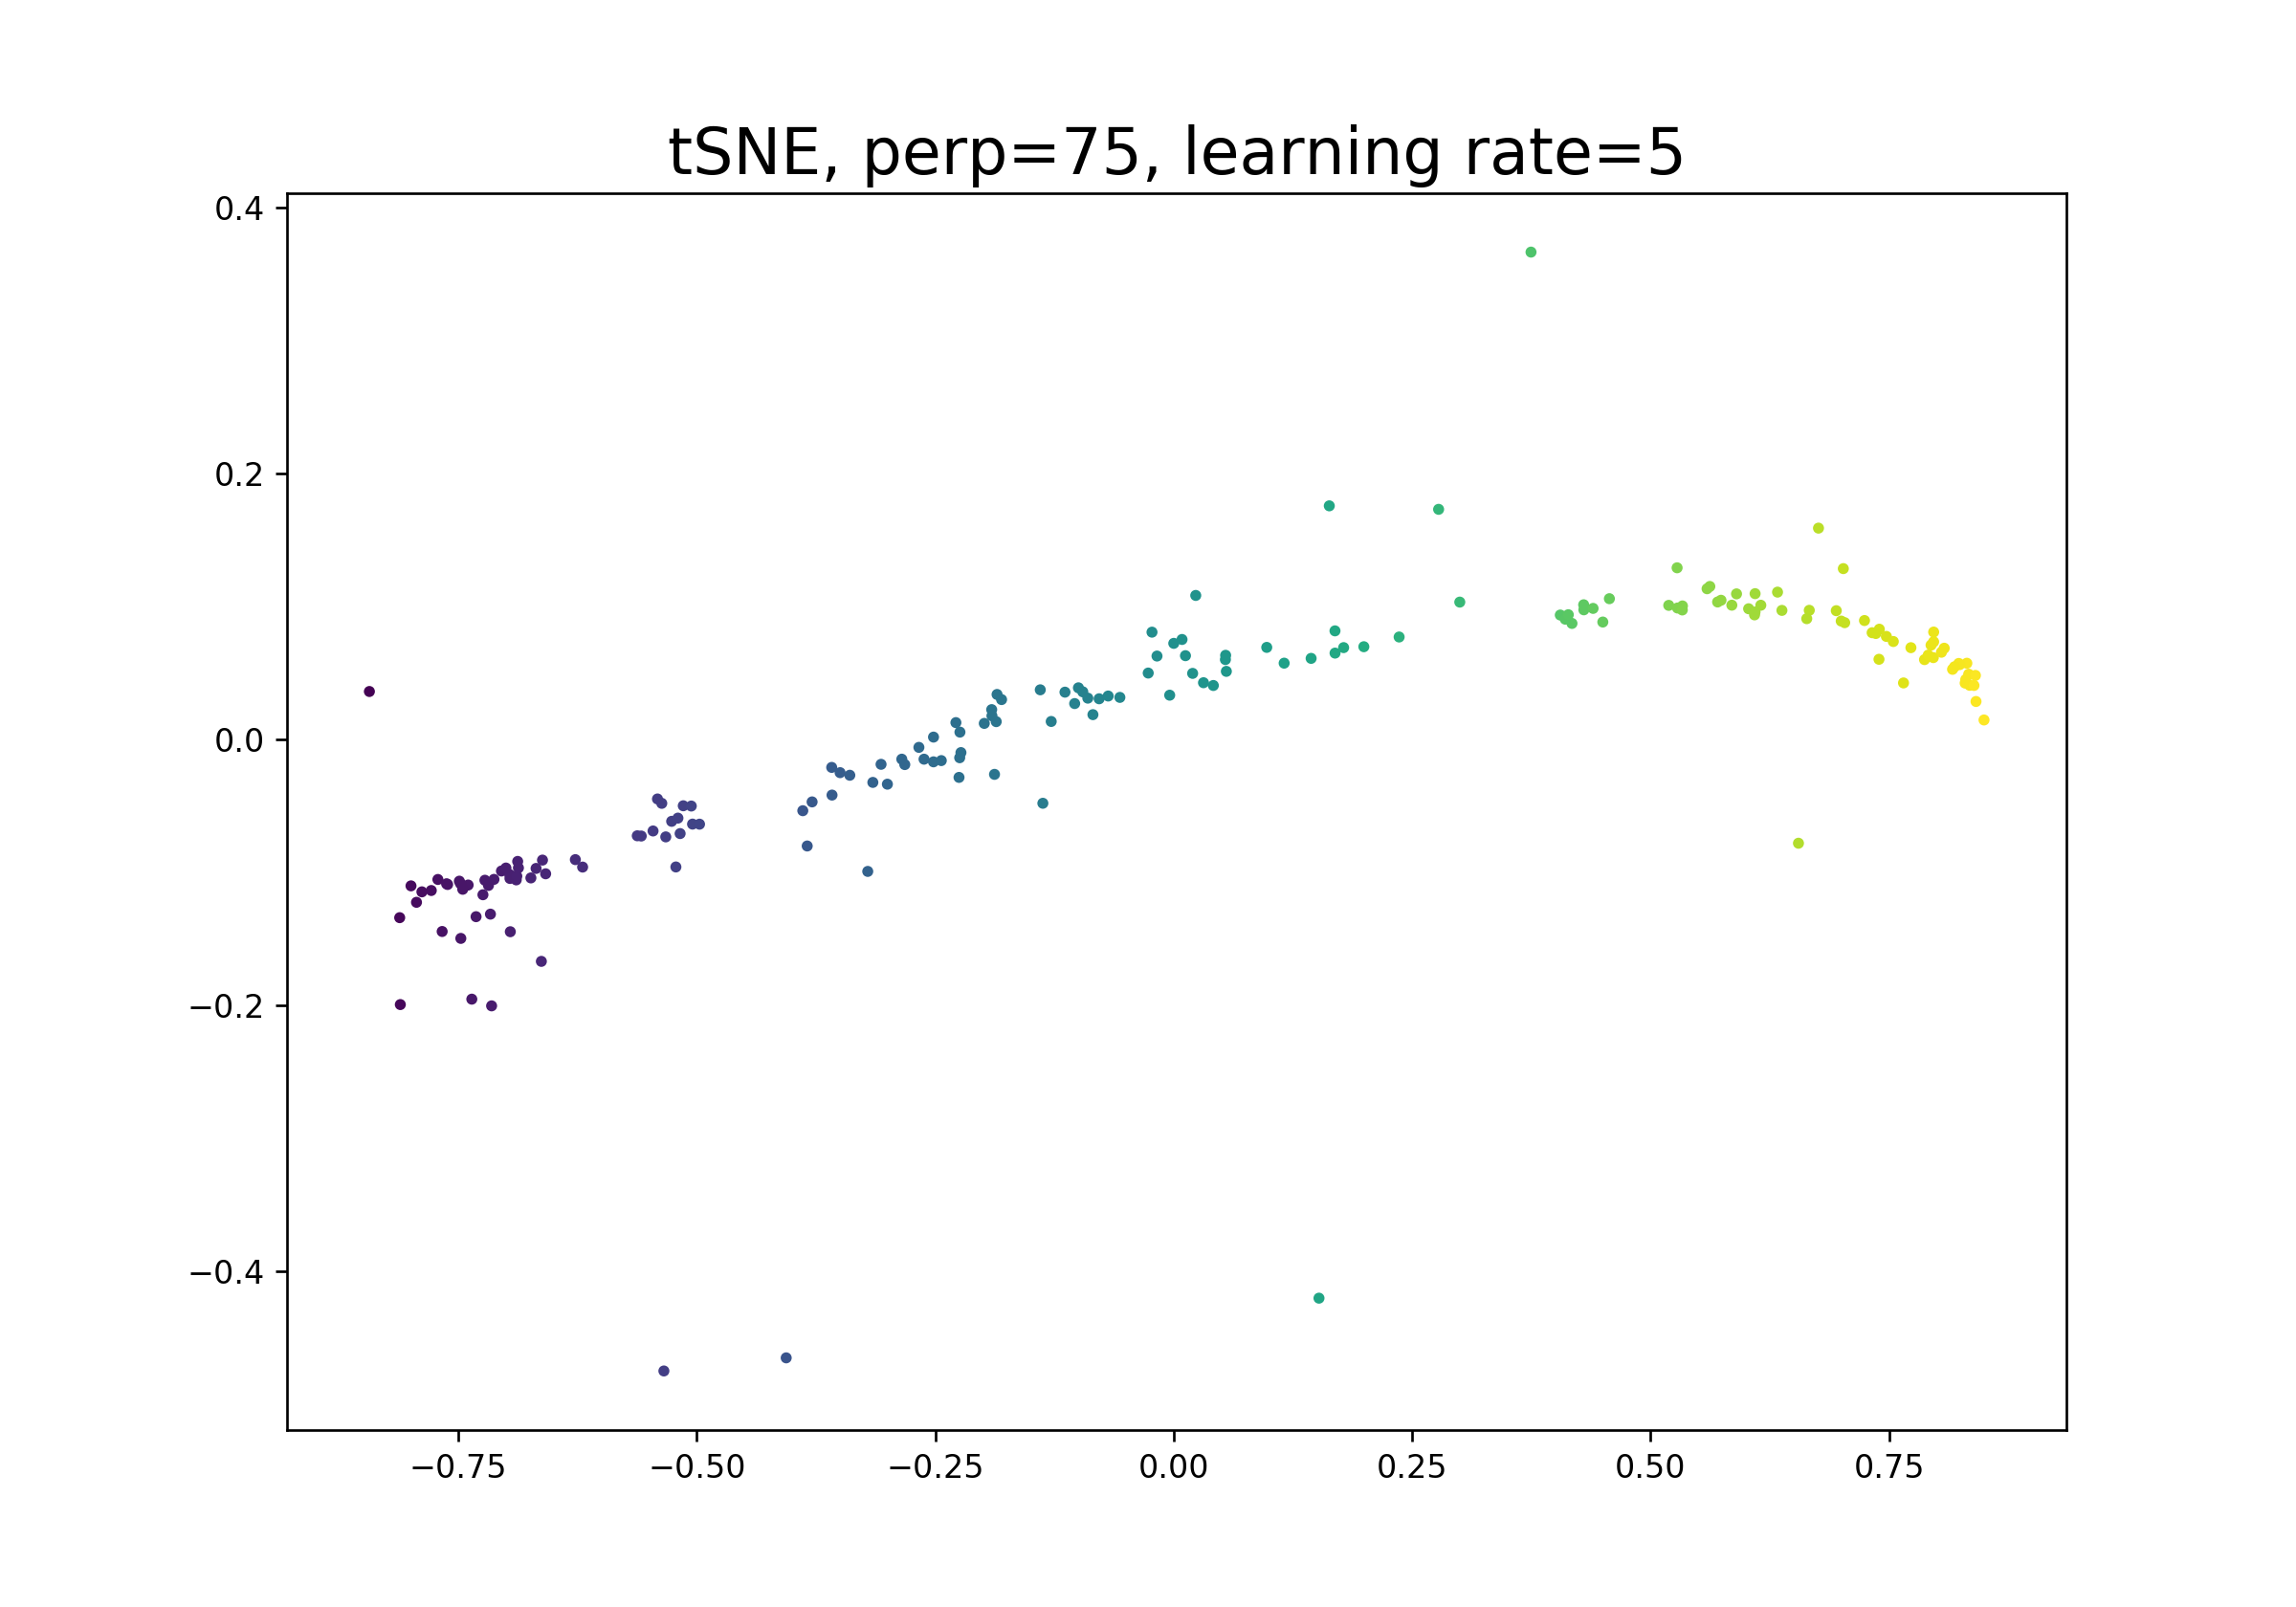

/Users/itamar/anaconda2/envs/avocado/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [21]:
plt.figure(figsize = (10,7))
plt.subplot(1, 1, 1)
plt.title("tSNE, perp=%s, learning rate=%s" % (prep_val, learn_val), fontsize = 20)
plt.scatter(x, y, c = x, s=6)
#plt.scatter(x[g1], y[g1], s=25, label = 'Group 1')
#plt.scatter(x[g2], y[g2], s=25, label = 'Group 2')
#plt.scatter(x[g3], y[g3], s=25, label = 'Group 3')

plt.legend(fontsize = 20)
#plt.xlabel("x")
#plt.ylabel("y")
#plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


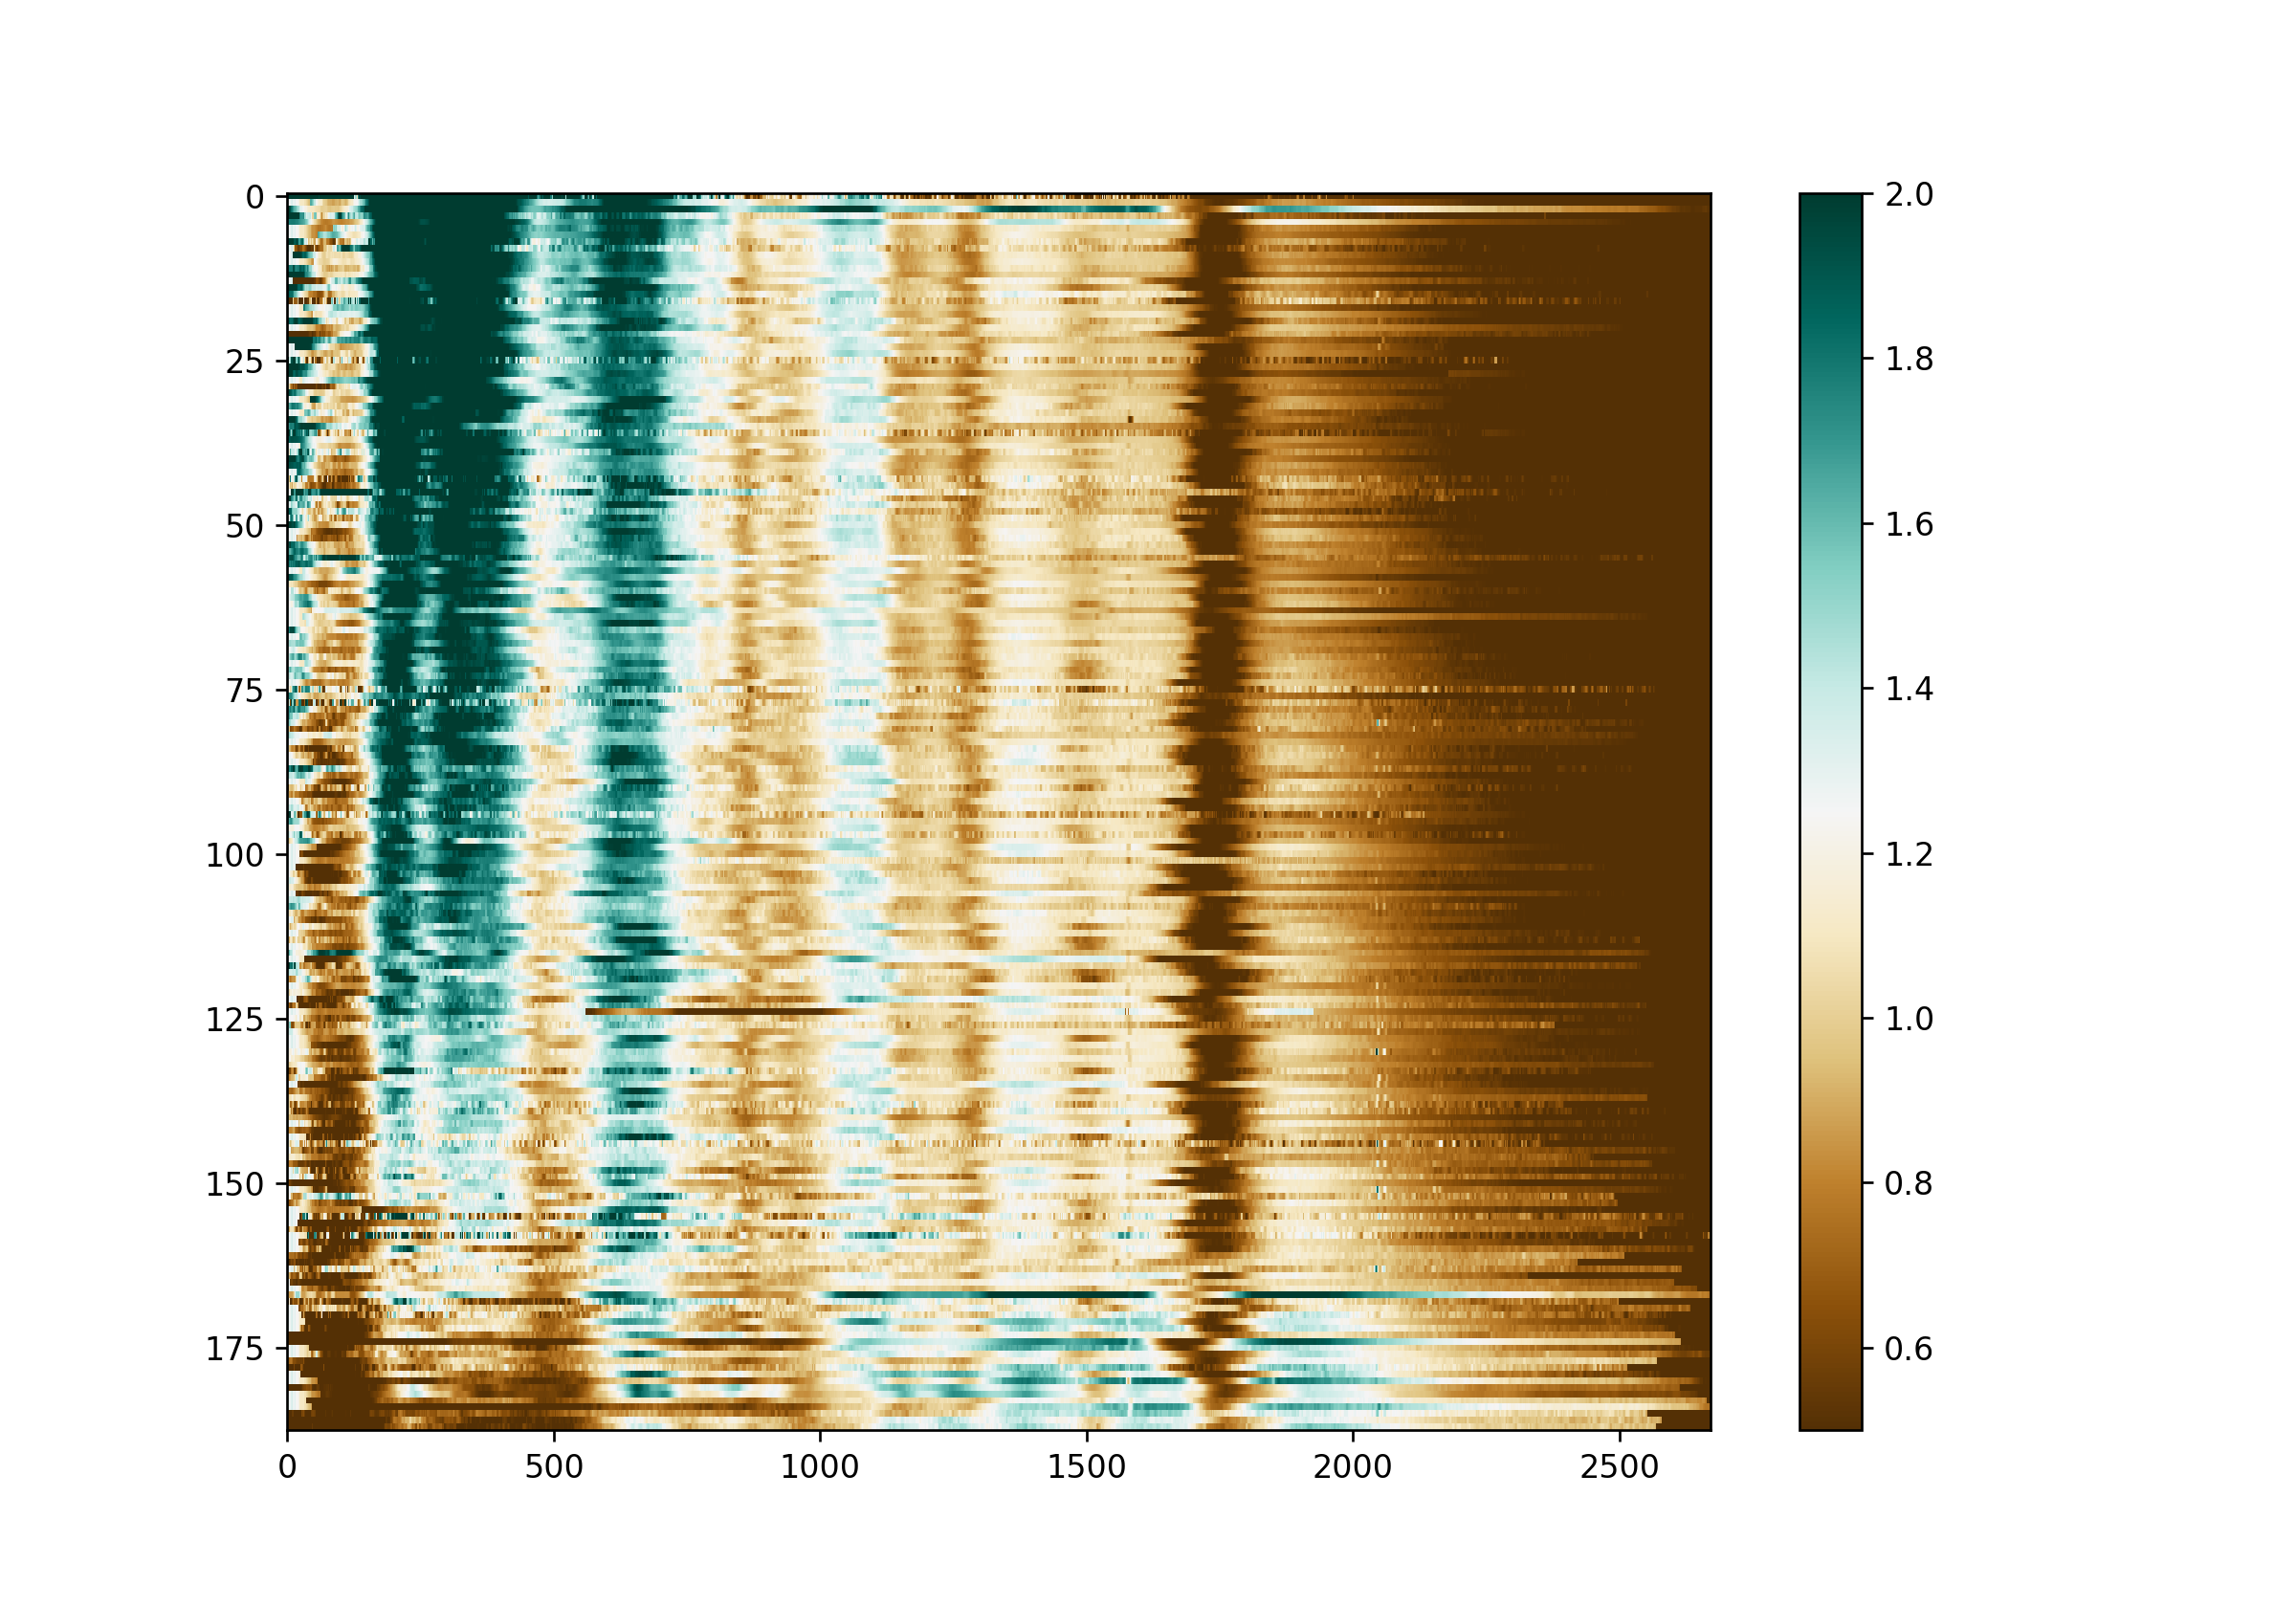

In [26]:
reload(specplotlib)
all_objects = numpy.arange(X_SG.shape[0])
_ = specplotlib.sequencer_plot_smooth(CW, X_SG, all_objects, x, smooth = 1)

<IPython.core.display.Javascript object>


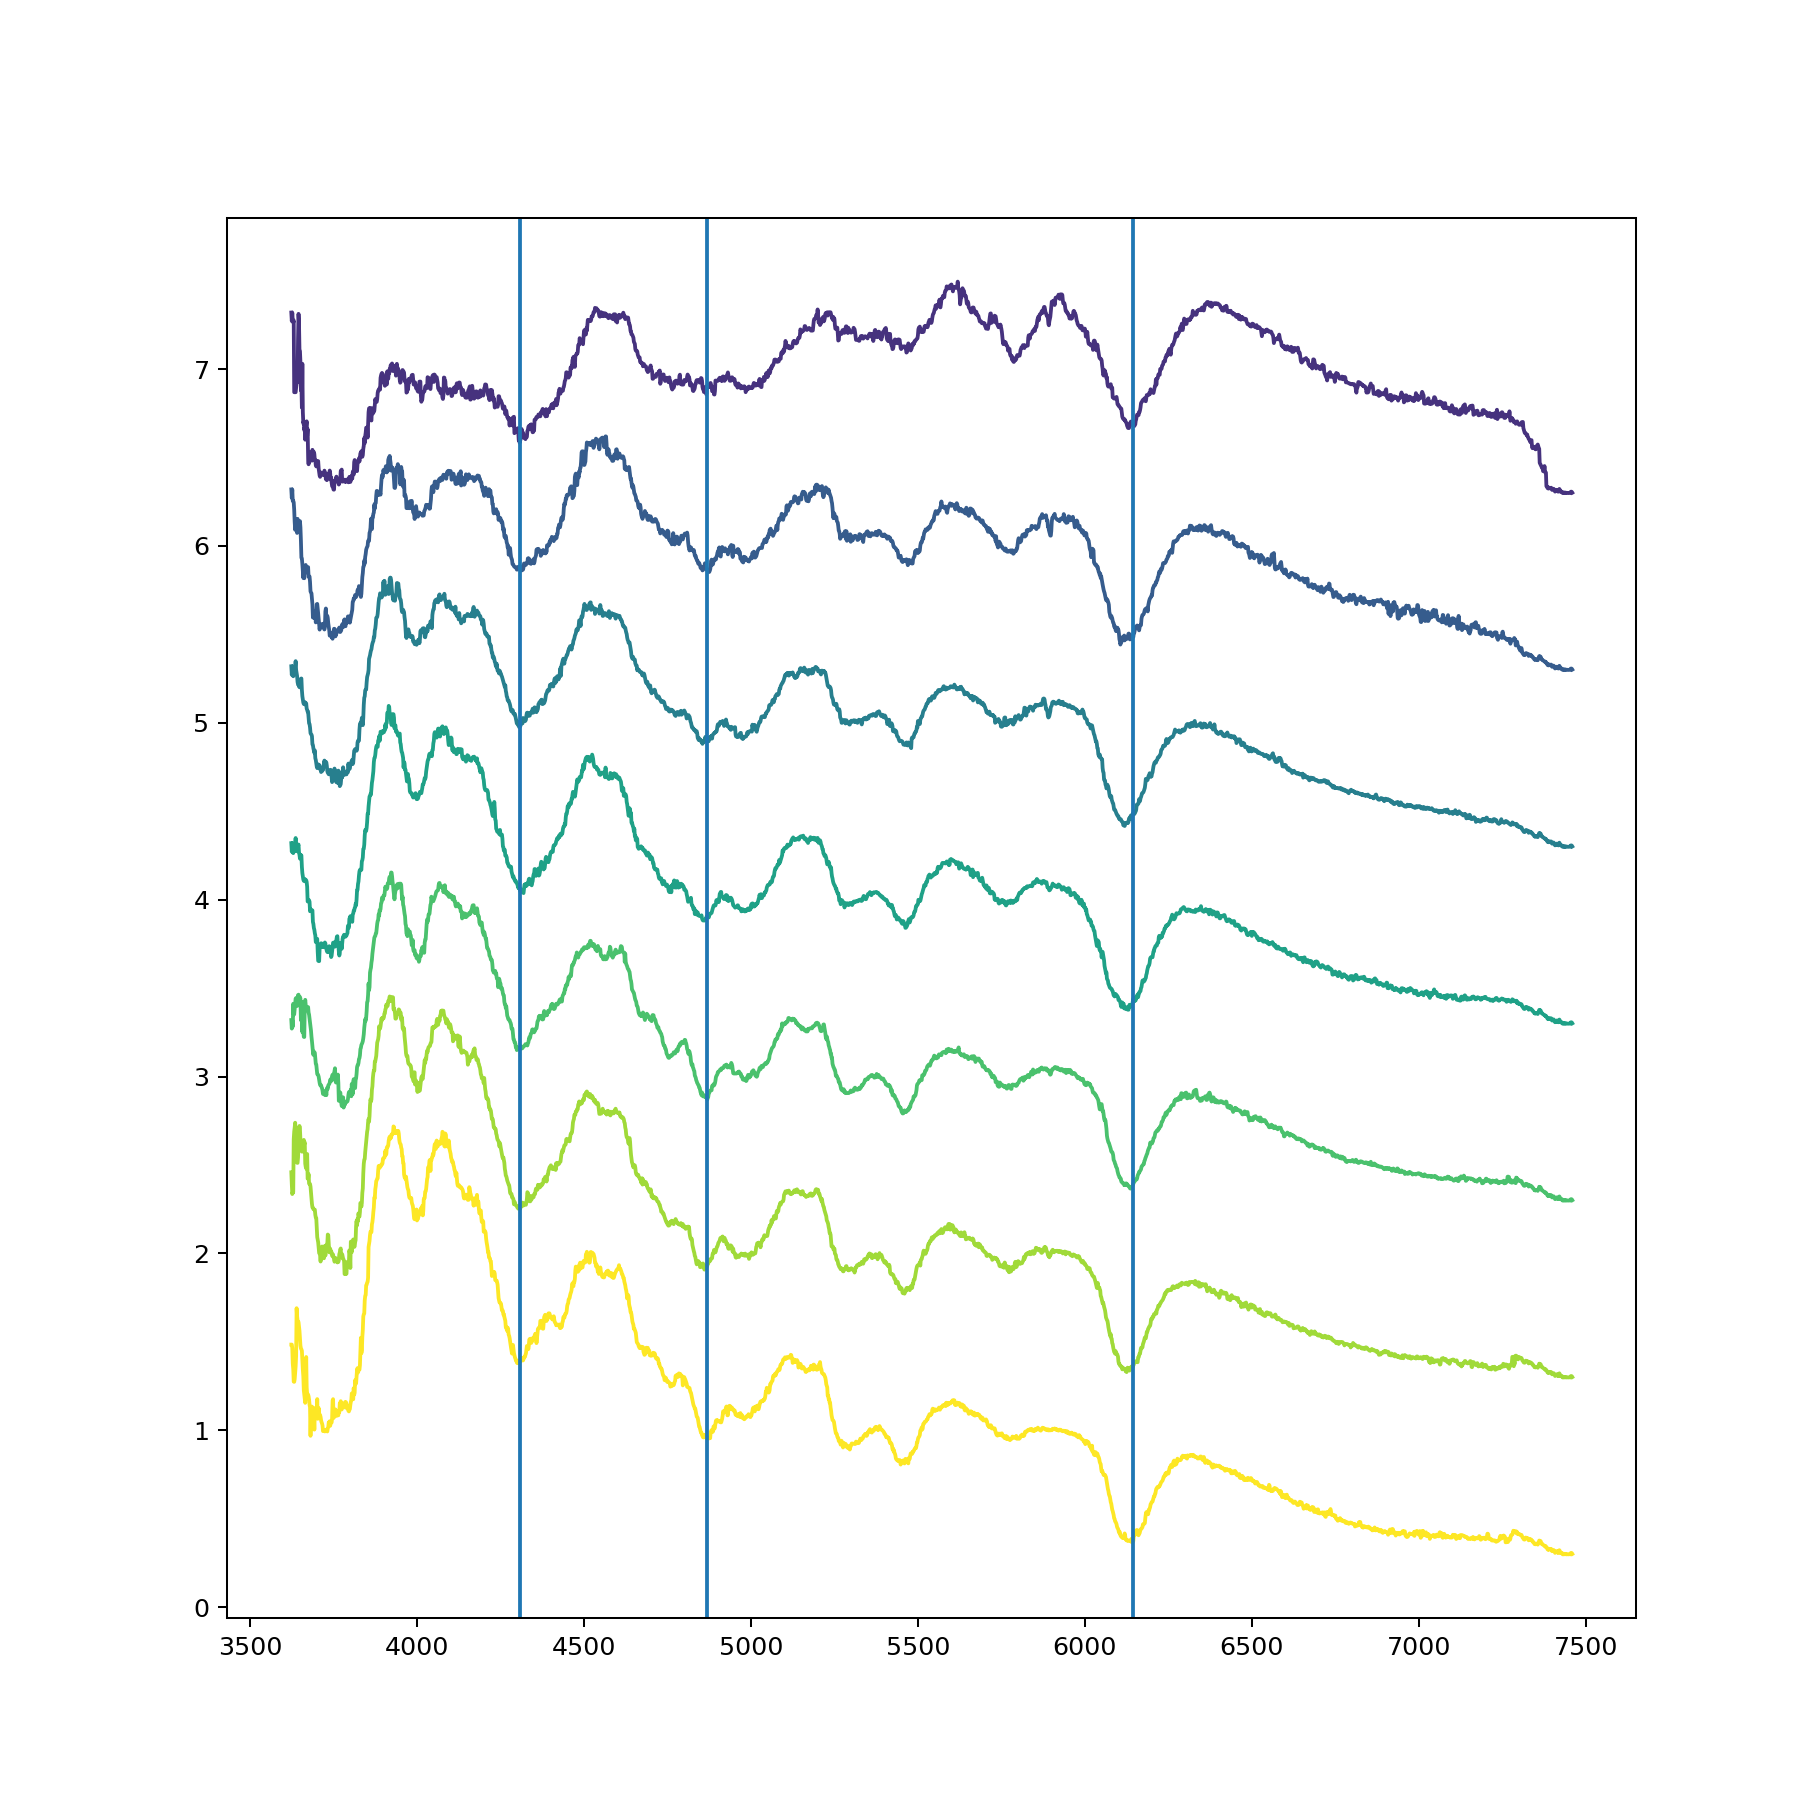

In [40]:
reload(specplotlib)
_ = specplotlib.ladder_plot_smooth(CW, X_SG, all_objects, x, nof_spectra = 7, delta = 1)

In [45]:
swc.reshape(-1,1).shape

(2671, 1)

In [47]:
import pysptools.spectro as spectro
from tqdm import trange

In [99]:
import pysptools.spectro as spectro
from tqdm import trange
keep_inds = []
X_SG_NORM = []
for i in trange(nof_objects):
    try:
        swc = X_SG[i]
        snc = spectro.SpectrumConvexHullQuotient(list(swc[:-k]), list(CW[:-k]))
        snc_s = numpy.concatenate(snc.crs)
        if numpy.isnan(snc_s).sum() == 0:
            keep_inds += [i]
            X_SG_NORM += [snc_s]
    except:
        continue
X_SG_NORM = numpy.vstack(X_SG_NORM)
len(keep_inds)

177

In [344]:
k

400

<IPython.core.display.Javascript object>


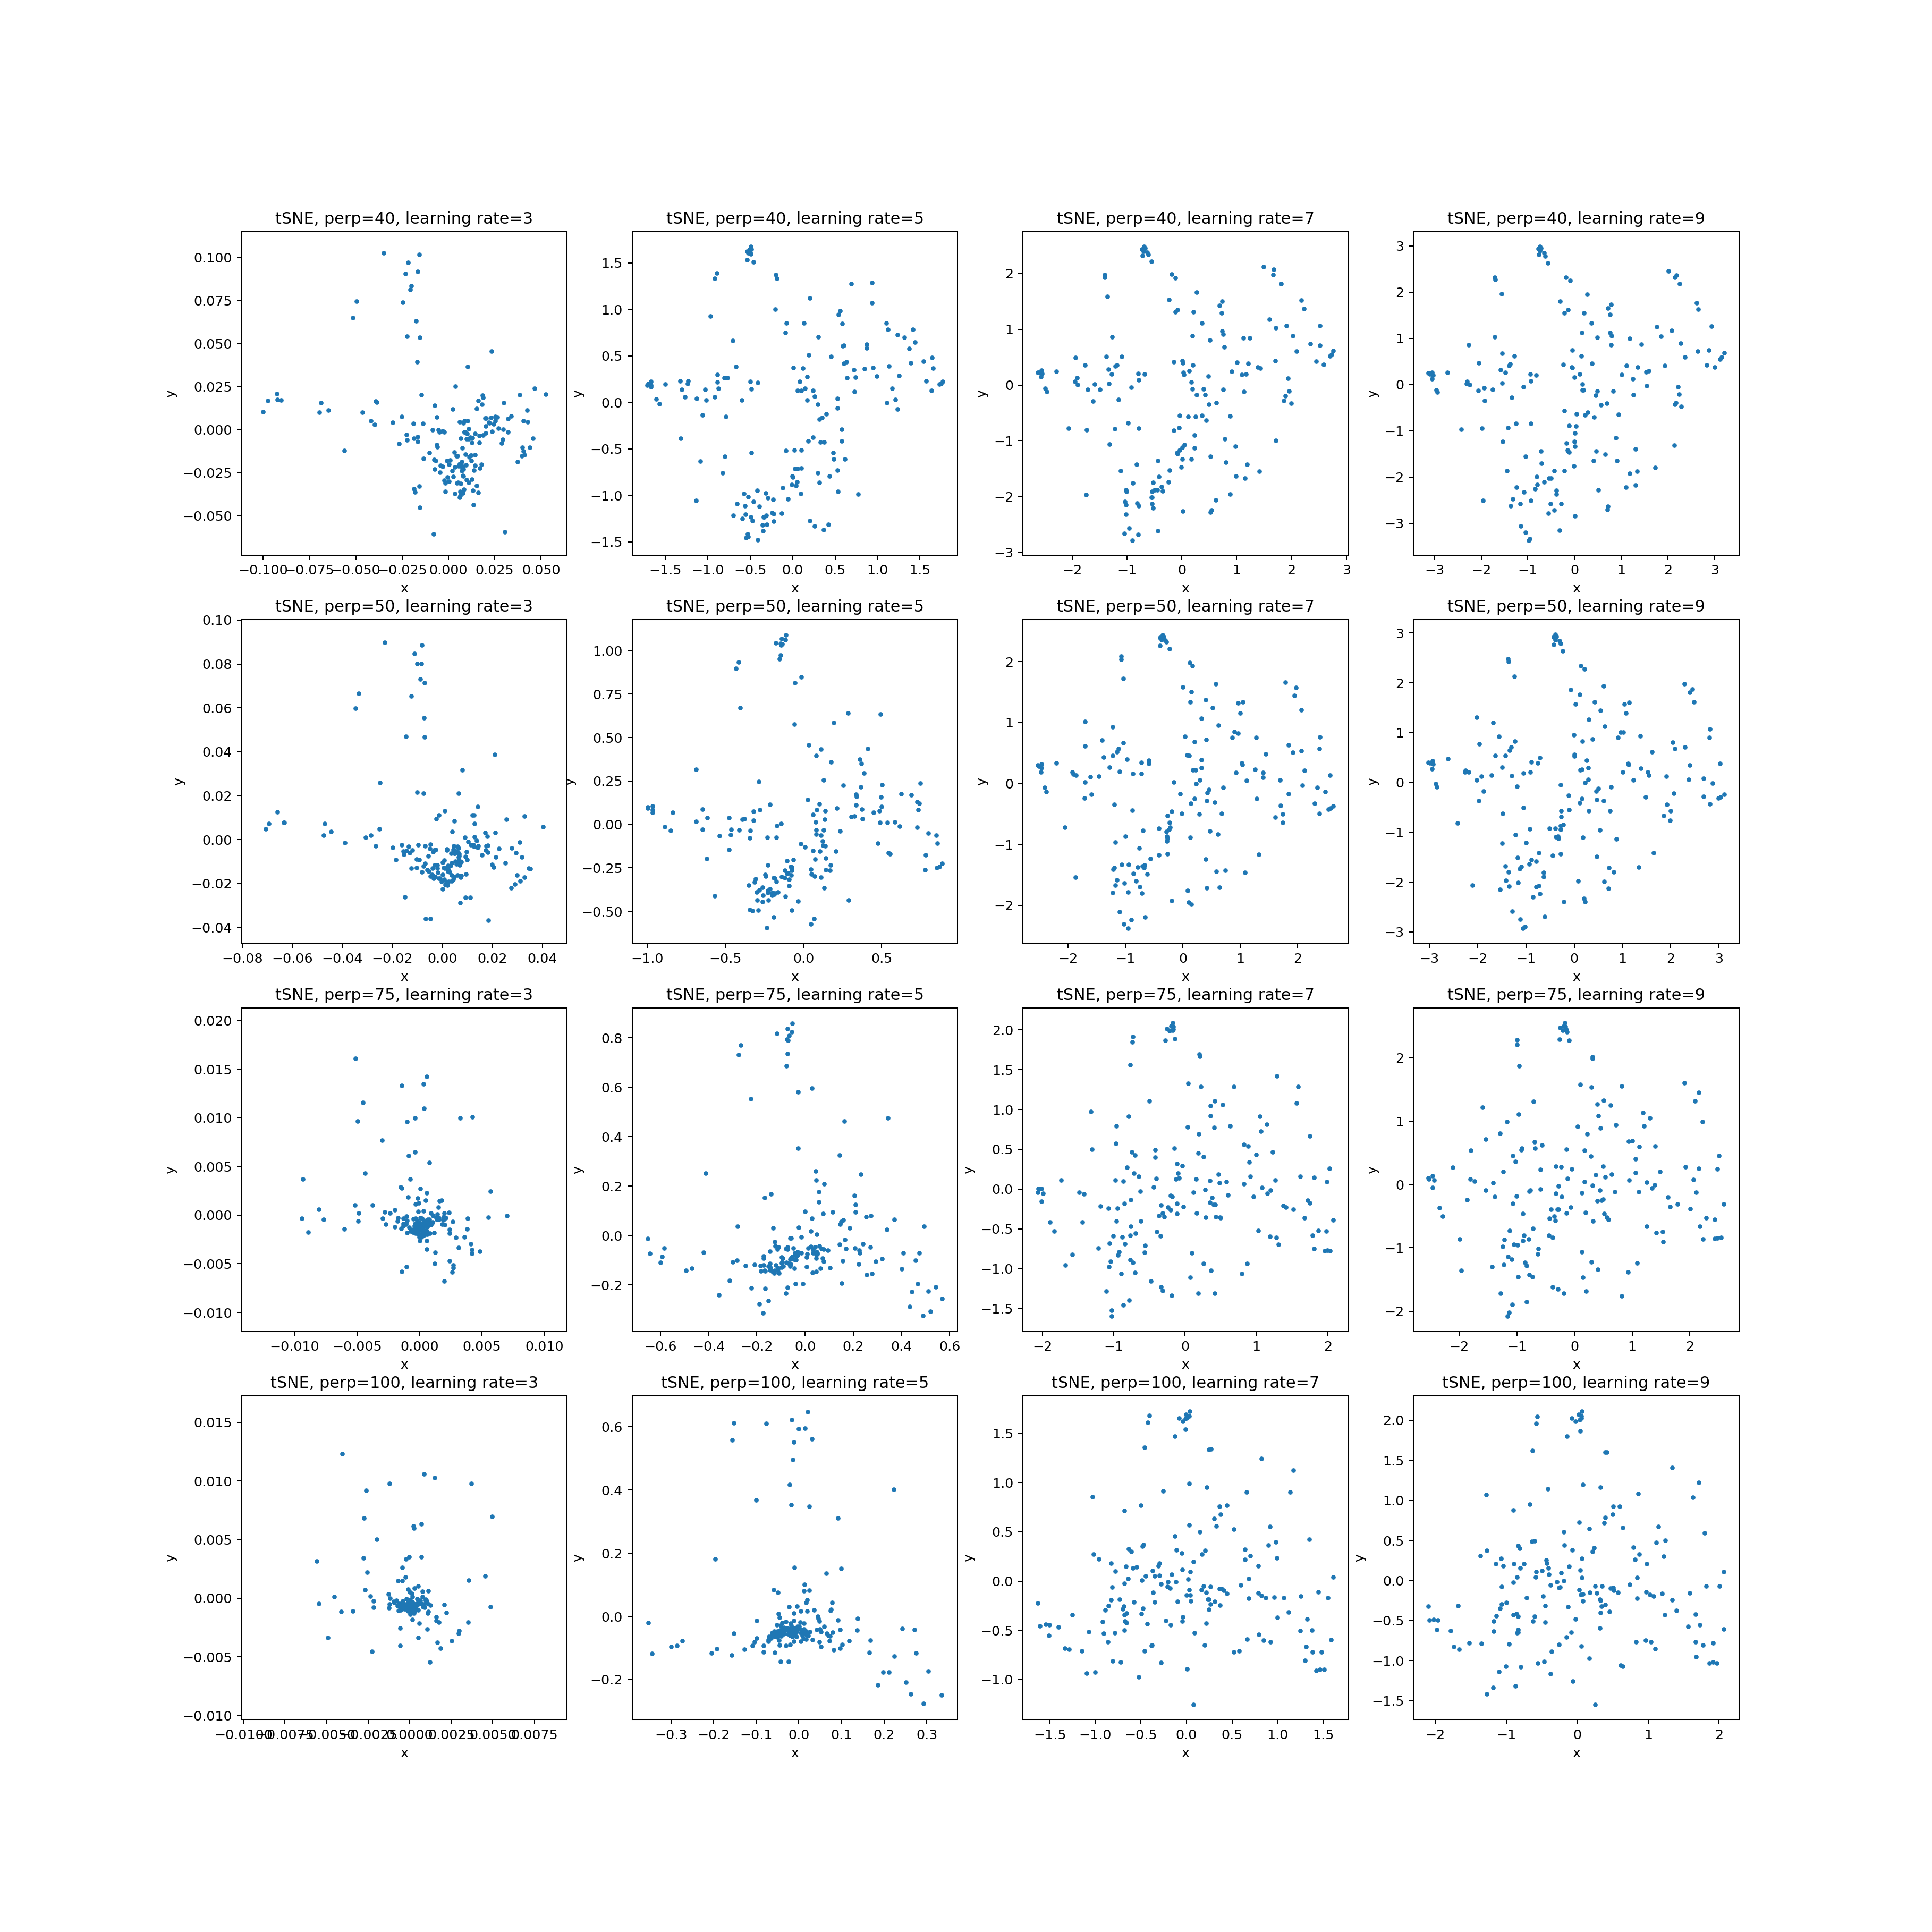

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


In [104]:
# now run the same analysis for different values of perplexity and learning rate
from sklearn.manifold import TSNE

prep_list = [40, 50, 75, 100] #how many "nearest neighbors" to consider 
learning_rate = [3, 5, 7, 9] #which gap to take between calculations of minima (resolution)
plt.rcParams['figure.figsize'] = 20, 20
plt.figure()


count = 1
for p, prep_val in enumerate(prep_list):
    for l, learn_val in enumerate(learning_rate):
        print(p, l)
        
        result = TSNE(perplexity=prep_val, learning_rate=learn_val, metric='euclidean', n_components=2, random_state=1).fit_transform(X_SG_NORM)
        x = result[:, 0]
        y = result[:, 1]
        plt.subplot(4, 4, count)
        plt.title("tSNE, perp=%s, learning rate=%s" % (prep_val, learn_val))
        plt.scatter(x, y, s=6)
        plt.xlabel("x")
        plt.ylabel("y")
        
        count += 1
        
#plt.tight_layout()
plt.show()

In [167]:
lc = pandas.read_csv('Itamar.csv')
lc = lc.set_index('SN')
lc.head()

Unnamed: 0  B_mag B_src
SN                            
1980N           0  12.40  CfA3
1981B           1  11.93  CfA3
1981D           2  12.49  CfA3
1986G           3  12.03  CfA3
1989B           4  12.23  CfA3

In [179]:
lcsm = pandas.read_csv('dm15.csv')
lcsm = lcsm.set_index('SN')
lcsm.head()

Unnamed: 0  dm15B   src
SN                            
1980N           0   1.28  CfA3
1981B           1   1.10  CfA3
1981D           2   1.32  CfA3
1986G           3   1.65  CfA3
1989B           4   1.02  CfA3

In [181]:
dm = numpy.zeros(len(keep_inds))
for i,n in enumerate(numpy.array(sn_name)[keep_inds]):
    if n in lcsm.index:
        dm[i] = lcsm['dm15B'].loc[n]
    else:
        dm[i] = numpy.nan
dm

array([ 1.35,   nan,  0.98,  1.02,  1.11,  0.77,   nan,  1.29,   nan,
         nan,   nan,  1.23,  1.41,  1.25,  1.16,  1.04,  1.06,  1.03,
        1.96,  1.04,   nan,  1.99,  1.23,  1.55,  1.08,  0.97,  1.15,
        0.81,  0.8 ,  1.33,  1.98,  1.46,  1.19,  0.86,  1.41,  1.21,
        1.16,  0.8 ,  1.47,   nan,   nan,   nan,   nan,  1.57,   nan,
         nan,  1.  ,   nan,   nan,   nan,  0.65,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,  0.98,   nan,
        1.26,   nan,   nan,  1.32,   nan,   nan,  1.12,   nan,  1.28,
         nan,   nan,   nan,   nan,  1.34,   nan,   nan,  1.04,   nan,
         nan,   nan,   nan,  1.16,   nan,   nan,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,  0.97,   nan,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,  1.73,   nan,   nan,
        1.06,  1.23,  0.86,  1.47,  1.66,   nan,  1.35,  1.87,   nan,
        1.35,   nan,

In [233]:
!head AB.csv

1980N,0.33499999999999996
1981B,0.365
1981D,0.538
1986G,1.939
1989B,1.3639999999999999
1990N,0.351
1990af,0.11599999999999999
1991T,0.48
1991bg,0.152
1992A,0.022


In [267]:
AB = pandas.read_csv('AB.csv')
AB = AB.set_index('SN')
AB.head(10)

Unnamed: 0     AB  m15B   src
SN                                   
1980N            0  0.335  1.28  CfA3
1981B            1  0.365  1.10  CfA3
1981D            2  0.538  1.32  CfA3
1986G            3  1.939  1.65  CfA3
1989B            4  1.364  1.02  CfA3
1990N            5  0.351  1.04  CfA3
1990af           6  0.116  1.63  CfA3
1991T            7  0.480  0.80  CfA3
1991bg           8  0.152  1.87  CfA3
1992A            9  0.022  1.36  CfA3

In [218]:
import astropy.units as u

<Quantity 10.0 pc>

In [213]:
from astropy.cosmology import WMAP9 as cosmo
cosmo.luminosity_distance(0.1)

<Quantity 465.28059165036956 Mpc>

In [229]:
SN_df.head()

zhel  tmax(B)  +/-       ref.  Dm15  +/-.1 ref..1    M_B  +/-.2  \
#SN                                                                         
1993ac  0.0503  49269.2  1.2      Jha07  1.19   0.10  Phi99 -99.99   9.99   
1993ae  0.0190  99999.9  9.9        NaN  9.99   9.99    NaN -99.99   9.99   
1994D   0.0029  49432.5  0.1  B,M,SA,SN  1.37   0.03      B -99.99   9.99   
1994M   0.0232  49474.5  0.9  B,M,SA,SN  1.26   0.06      B -19.21   0.08   
1994Q   0.0295  49496.2  1.1      Jha07  1.03   0.10  Phi99 -99.99   9.99   

         B-V  +/-.3  Bm-Vm  +/-.4  Phot.  ref..2  n_spec  
#SN                                                       
1993ac -9.99   9.99  -9.99   9.99   CfA1     NaN     2.0  
1993ae -9.99   9.99  -9.99   9.99   CfA1     NaN     1.0  
1994D  -9.99   9.99  -9.99   9.99  Jha07     NaN    26.0  
1994M  -0.11   0.06  -0.10   0.06   CfA1     NaN     9.0  
1994Q  -9.99   9.99  -9.99   9.99   CfA1     NaN     4.0

In [282]:
from astropy.cosmology import WMAP9 as cosmo
import astropy.units as u
def get_intrinsic_mag(sn_name, Z, B, AB):
    MB = numpy.zeros(len(sn_name))
    for i,n in enumerate(sn_name):
        try:
            mb = B.loc[n]
            d = cosmo.luminosity_distance(Z.loc[n])
            ab = AB.loc[n]
            MB[i] = mb - 5*numpy.log10(d/(10 * u.pc))  - ab
        except:
            MB[i] = numpy.nan   
    return pandas.DataFrame(index=sn_name, data=MB)

In [287]:
MB = get_intrinsic_mag(AB.index, SN_df['zhel'], lc['B_mag'], AB['AB'])
MB.head(10)

0
SN        
1980N  NaN
1981B  NaN
1981D  NaN
1986G  NaN
1989B  NaN
1990N  NaN
1990af NaN
1991T  NaN
1991bg NaN
1992A  NaN

In [284]:
mb1_ = []
mb2_ = []
for n in sn_name:
    mb1 = MB[0].loc[n]
    mb2 = SN_df['M_B'].loc[n]
    if (mb2 > -99) and (~numpy.isnan(mb1)):
        mb1_ += [mb1]
        mb2_ += [mb2]
        print(mb1, mb2)

-19.4151548243 -19.55
-19.8603710058 -19.56
-19.5504089314 -19.3
-18.8365227026 -19.17
-19.3159146413 -19.64
-19.0587817561 -19.14
-20.004696849 -19.55
-19.3104555868 -19.33
-19.6040087586 -19.64
-19.1027548838 -19.44
-19.7321548243 -19.6
-19.3124795631 -19.27
-19.3149556731 -19.5
-19.0953646131 -19.45
-19.4093723709 -19.51
-19.3665155634 -19.39
-19.3729146413 -19.24
-19.5832218757 -19.59
-19.4035581613 -19.31
-19.239290302 -19.47
-19.2350782786 -19.18
-19.4252077658 -19.63
-19.1430301595 -19.19
-18.981354313 -19.22
-18.9436154274 -19.18
-19.4017982196 -19.64
-19.3715174928 -19.5
-19.2644467339 -19.28
-19.542715114 -19.47
-19.5057139807 -19.64
-19.7528453934 -19.65
-19.6235291198 -19.59
-19.1526237334 -19.18
-19.2889176356 -19.57
-19.118052842 -19.29
-19.226290302 -19.21
-19.574763111 -19.41
-19.668138704 -19.35
-19.6176791446 -19.53


In [291]:
%matplotlib notebook

In [305]:
5*numpy.log10(d/(10 * u.pc)), d

(<Quantity 34.21358900760612>, <Quantity 69.61740029809823 Mpc>)

In [326]:
AB

Unnamed: 0     AB  m15B   src
SN                                   
1980N            0  0.335  1.28  CfA3
1981B            1  0.365  1.10  CfA3
1981D            2  0.538  1.32  CfA3
1986G            3  1.939  1.65  CfA3
1989B            4  1.364  1.02  CfA3
1990N            5  0.351  1.04  CfA3
1990af           6  0.116  1.63  CfA3
1991T            7  0.480  0.80  CfA3
1991bg           8  0.152  1.87  CfA3
1992A            9  0.022  1.36  CfA3
1992ag          10  0.496  1.10  CfA3
1992al          11  0.052  1.10  CfA3
1992bc          12  0.019  0.82  CfA3
1992bh          13  0.291   NaN  CfA3
1992bo          14  0.054   NaN  CfA3
1992bp          15  0.057  1.34  CfA3
1993H           16  0.046  1.76  CfA3
1993O           17  0.076  1.23  CfA3
1993ag          18  0.162   NaN  CfA3
1994D           19  0.014  1.35  CfA3
1994S           20  0.075   NaN  CfA3
1994T           21  0.084  1.36  CfA3
1994ae          22  0.078  0.98  CfA3
1995D           23  0.108  1.02  CfA3
1995E           24  2.319  1.11  CfA3
1995ac          25  0.168  0.77  CfA3
1995ak          26  0.411   NaN  CfA3
1995al          27  0.281  0.84  CfA3
1995bd          28  0.734  0.94  CfA3
1996X           29  0.049  1.29  CfA3
...            ...    ...   ...   ...
2006cm         104  2.905  0.99  CfA3
2006cp         105  0.699   NaN  CfA3
2006D          106  0.121  1.35  CfA3
2006gj         107  0.766  1.39  CfA3
2006gr         108  0.483  0.95  CfA3
2006kf         109  0.038   NaN  CfA3
2006le         110  0.121  0.85  CfA3
2006lf         111  0.151  1.35  CfA3
2006mp         112  0.264   NaN  CfA3
2006N          113  0.043  1.57  CfA3
2006nz         114  0.149   NaN  CfA3
2006oa         115  0.295  0.98  CfA3
2006ob         116  0.033  1.70  CfA3
2006qo         117  0.719  1.02  CfA3
2006S          118  0.426  0.91  CfA3
2006sr         119  0.135  1.26  CfA3
2006td         120  0.272  1.48  CfA3
2006X          121  3.964  1.10  CfA3
2007af         122  0.341  1.20  CfA3
2007au         123  0.078  1.95  CfA3
2007bc         124  0.133  1.35  CfA3
2007bd         125  0.068   NaN  CfA3
2007ca         126  0.921   NaN  CfA3
2007ci         127  0.118   NaN  CfA3
2007co         128  0.623  1.14  CfA3
2007cq         129  0.173  1.17  CfA3
2007F          130  0.075  0.93  CfA3
2007qe         131  0.235  0.98  CfA3
2007S          132  1.323  0.88  CfA3
2008bf         133  0.162  1.01  CfA3

[134 rows x 4 columns]

In [329]:
mrg = pandas.concat([SN_df[['Dm15', 'M_B']], MB[ 0]],axis=1 ,join='inner')
mrg.head(20)

Dm15    M_B          0
1994D   1.37 -99.99 -18.730734
1994S   0.94 -19.55 -19.415155
1994T   1.51 -99.99 -18.696714
1994ae  0.96 -99.99 -18.482460
1995D   1.05 -99.99 -19.259550
1995E   1.16 -99.99 -19.234995
1995ac  0.77 -19.56 -19.860371
1995ak  1.25 -19.39 -19.409003
1995al  0.87 -99.99 -18.677323
1995bd  0.94 -99.99 -19.560200
1996X   1.26 -99.99 -19.422890
1996bo  1.16 -19.30 -19.550409
1997E   1.40 -19.17 -18.836523
1997bp  1.08 -99.99 -19.640265
1997br  1.09 -99.99 -19.690143
1998aq  1.11 -99.99 -18.848763
1998bp  1.79 -99.99 -18.063520
1998bu  1.03 -99.99 -19.378734
1998de  1.88 -99.99 -17.247517
1998es  0.85 -99.99 -19.823271

In [331]:
%matplotlib inline

In [ ]:
mrg['M_B']-mrg[0]

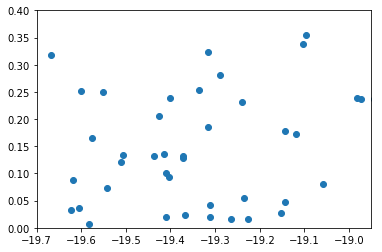

In [364]:
plt.figure()

plt.scatter( mrg[0],  abs(mrg[0] - mrg['M_B']))
plt.xlim([-19.7,-18.95])
#plt.ylim([-20.2,-18.5])
plt.ylim([0,0.4])
plt.show()

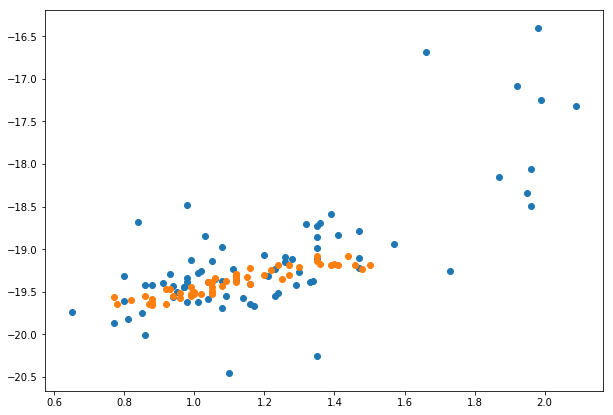

In [350]:
plt.figure(figsize = (10,7))

plt.scatter(AB['m15B'], MB[0], )
g4n = numpy.array(sn_name)[keep_inds[g4]]
plt.scatter(SN_df['Dm15'].loc[g4n], SN_df['M_B'].loc[g4n])
#plt.scatter(AB['m15B'].loc[g4n], MB[0].loc[g4n], alpha = 0.5)
#plt.scatter(AB['m15B'].loc[g4n], SN_df['M_B'].loc[g4n])

#plt.scatter(SN_df['Dm15'].loc[g4n], MB[0].loc[g4n])

#gn = numpy.array(sn_name)[keep_inds[g1]]
#plt.scatter(SN_df['Dm15'].loc[gn], SN_df['M_B'].loc[gn])

#plt.scatter(AB['m15B'].loc[g2n], MB[0].loc[g2n], )

#plt.scatter(SN_df['Dm15'].loc[g1n], SN_df['M_B'].loc[g1n])
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

In [312]:
xlim = plt.xlim()
ylim = plt.ylim()

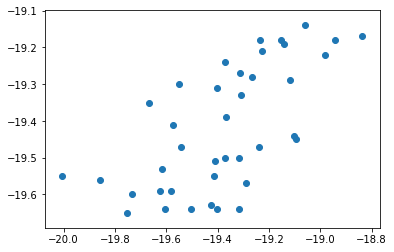

In [285]:
plt.figure()
plt.scatter(mb1_, mb2_)
plt.show()

In [259]:
MB.head(10)

1994D    -18.730734
1994M           NaN
1994S    -19.415155
1994T    -18.696714
1994ae   -18.482460
1995D    -19.259550
1995E    -19.234995
1995ac   -19.860371
1996C           NaN
1996X    -19.422890
dtype: float64

In [258]:
SN_df.head(10)

zhel  tmax(B)  +/-       ref.  Dm15  +/-.1 ref..1    M_B  +/-.2  \
#SN                                                                         
1993ac  0.0503  49269.2  1.2      Jha07  1.19   0.10  Phi99 -99.99   9.99   
1993ae  0.0190  99999.9  9.9        NaN  9.99   9.99    NaN -99.99   9.99   
1994D   0.0029  49432.5  0.1  B,M,SA,SN  1.37   0.03      B -99.99   9.99   
1994M   0.0232  49474.5  0.9  B,M,SA,SN  1.26   0.06      B -19.21   0.08   
1994Q   0.0295  49496.2  1.1      Jha07  1.03   0.10  Phi99 -99.99   9.99   
1994S   0.0151  49518.3  0.3  B,M,SA,SN  0.94   0.06      B -19.55   0.09   
1994T   0.0346  49514.4  0.4       M,SN  1.51   0.08     SN -99.99   9.99   
1994ae  0.0043  49685.5  0.8  B,M,SA,SN  0.96   0.04      B -99.99   9.99   
1995D   0.0067  49768.7  0.1  B,M,SA,SN  1.05   0.03      B -99.99   9.99   
1995E   0.0120  49775.2  0.5  B,M,SA,SN  1.16   0.05      B -99.99   9.99   

         B-V  +/-.3  Bm-Vm  +/-.4       Phot.  ref..2  n_spec  
#SN                                                            
1993ac -9.99   9.99  -9.99   9.99        CfA1     NaN     2.0  
1993ae -9.99   9.99  -9.99   9.99        CfA1     NaN     1.0  
1994D  -9.99   9.99  -9.99   9.99       Jha07     NaN    26.0  
1994M  -0.11   0.06  -0.10   0.06        CfA1     NaN     9.0  
1994Q  -9.99   9.99  -9.99   9.99        CfA1     NaN     4.0  
1994S  -0.12   0.05  -0.11   0.05        CfA1     NaN     4.0  
1994T  -9.99   9.99  -9.99   9.99        CfA1     NaN     5.0  
1994ae -9.99   9.99  -9.99   9.99  CfA1,Jha07     NaN    18.0  
1995D  -9.99   9.99  -9.99   9.99  CfA1,Jha07     NaN    14.0  
1995E  -9.99   9.99  -9.99   9.99        CfA1     NaN     7.0

In [250]:
MB = get_intrinsic_mag(sn_name, SN_df['zhel'], lc['B_mag'], AB[1])
MB

1994D    -18.730734
1994M           NaN
1994S    -19.415155
1994T    -18.696714
1994ae   -18.482460
1995D    -19.259550
1995E    -19.234995
1995ac   -19.860371
1996C           NaN
1996X    -19.422890
1996Z           NaN
1996ab          NaN
1996ai          NaN
1996bk          NaN
1996bl          NaN
1996bo   -19.550409
1997E    -18.836523
1997Y           NaN
1997bp   -19.640265
1997dt          NaN
1998V           NaN
1998aq   -18.848763
1998bp   -18.063520
1998bu   -19.378734
1998co          NaN
1998de   -17.247517
1998dh          NaN
1998dx          NaN
1998ec          NaN
1998ef          NaN
            ...    
2006oa   -19.623529
2006ot          NaN
2006sr   -19.152624
2007A           NaN
2007F    -19.288918
2007S    -19.421341
2007ae          NaN
2007af   -19.061949
2007al          NaN
2007au   -18.336562
2007ax          NaN
2007ba          NaN
2007bc   -19.118053
2007bd   -19.226290
2007ca   -18.920697
2007ci          NaN
2007co   -19.574763
2007cq   -19.668139
2007fb          NaN


In [308]:
"""c_ = numpy.zeros(len(keep_inds))
for i,n in enumerate(numpy.array(sn_name)[keep_inds]):
    if n in lc.index:
        c_[i] = lc['B_mag'].loc[n]
        z = SN_df['zhel'].loc[n]
        d = cosmo.luminosity_distance(z)
        ab = AB[1].loc[n]
        c_[i] = c_[i] - 5*numpy.log10(d/(10 * u.pc))  - ab
        print(n, c_[i], SN_df['M_B'].loc[n])
    else:
        c_[i] = numpy.nan
c_
"""

"c_ = numpy.zeros(len(keep_inds))\nfor i,n in enumerate(numpy.array(sn_name)[keep_inds]):\n    if n in lc.index:\n        c_[i] = lc['B_mag'].loc[n]\n        z = SN_df['zhel'].loc[n]\n        d = cosmo.luminosity_distance(z)\n        ab = AB[1].loc[n]\n        c_[i] = c_[i] - 5*numpy.log10(d/(10 * u.pc))  - ab\n        print(n, c_[i], SN_df['M_B'].loc[n])\n    else:\n        c_[i] = numpy.nan\nc_\n"

In [186]:
%matplotlib inline

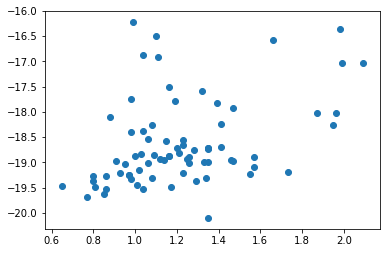

In [221]:
plt.figure()
plt.scatter(dm, c_)
plt.show()

In [174]:
pinds = numpy.where(~numpy.isnan(c_))
c_[pinds], c_[pinds].shape

(array([ 11.78,  14.76,  12.95,  13.17,  16.68,  17.06,  12.98,  15.83,
         15.12,  15.28,  13.91,  15.64,  15.88,  12.31,  15.28,  12.12,
         17.3 ,  14.24,  17.71,  16.44,  15.21,  16.62,  13.83,  14.72,
         14.09,  13.54,  16.76,  14.87,  14.42,  15.65,  15.61,  17.02,
         15.99,  17.08,  15.34,  15.99,  14.64,  14.87,  14.68,  14.19,
         13.94,  15.53,  14.16,  17.54,  16.66,  14.6 ,  14.24,  13.11,
         14.69,  16.58,  15.85,  15.79,  13.43,  16.97,  13.28,  16.93,
         13.62,  13.24,  14.84,  16.28,  15.84,  14.88,  15.56,  17.55,
         17.21,  14.13,  15.08,  16.79,  15.28,  15.01,  16.91,  18.33,
         18.05,  17.67,  16.91,  14.78,  13.7 ,  18.11,  17.84,  16.14,
         15.87,  15.82,  13.13,  16.46,  15.82,  16.53,  16.43,  15.82,
         15.72]), (89,))

<IPython.core.display.Javascript object>


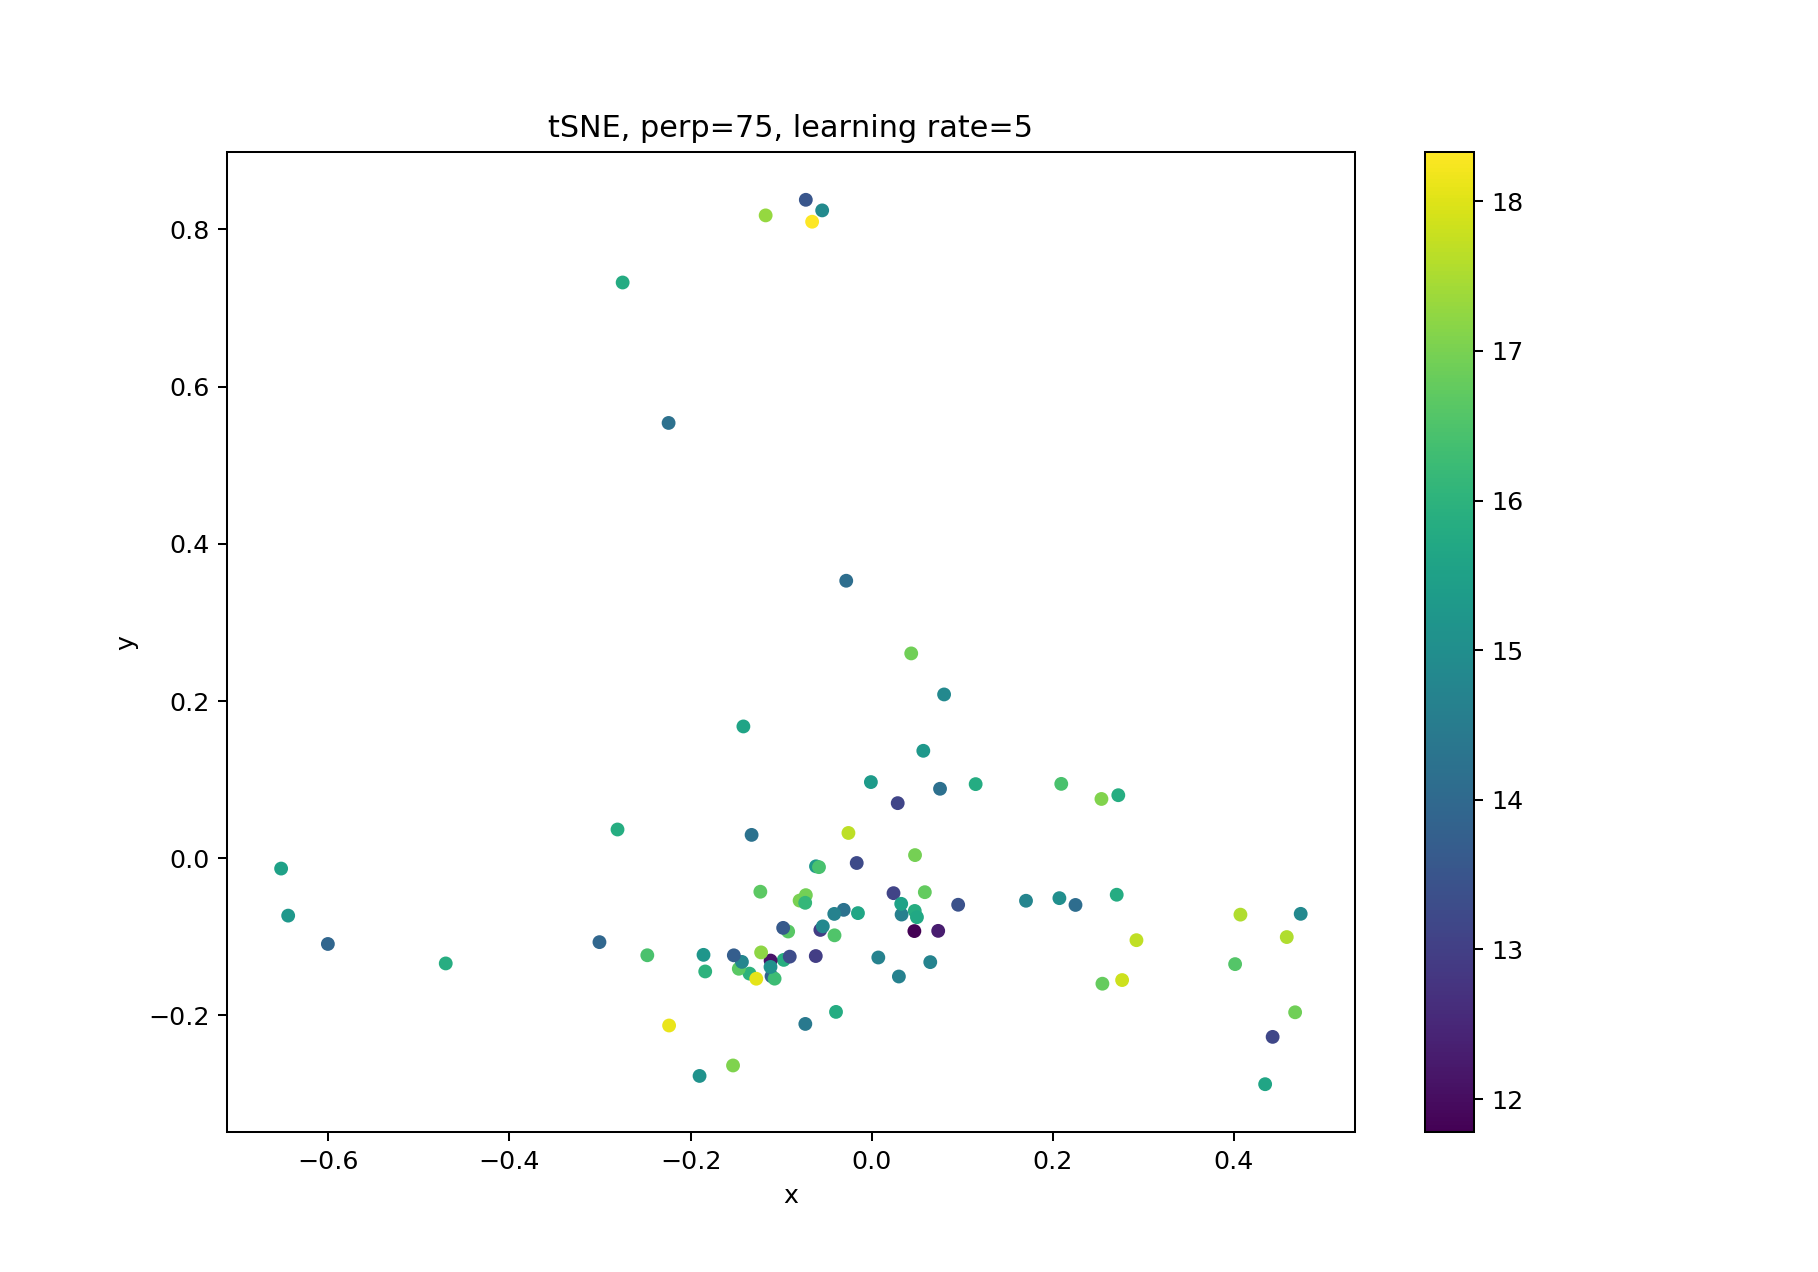

0 0


In [177]:
# now run the same analysis for different values of perplexity and learning rate
from sklearn.manifold import TSNE

prep_list = [75] #how many "nearest neighbors" to consider 
learning_rate = [5] #which gap to take between calculations of minima (resolution)
plt.figure(figsize = (10,7))
#plt.rcParams['figure.figsize'] = 10,7

count = 1
for p, prep_val in enumerate(prep_list):
    for l, learn_val in enumerate(learning_rate):
        print(p, l)
        
        #result = TSNE(perplexity=prep_val, learning_rate=learn_val, metric='euclidean', n_components=2, random_state=1).fit_transform(X_SG_NORM)
        #x = result[:, 0]
        #y = result[:, 1]
        plt.subplot(1, 1, count)
        plt.title("tSNE, perp=%s, learning rate=%s" % (prep_val, learn_val))
        #plt.scatter(x, y, c=numpy.array(indicies)[keep_inds], s=6)
        
        plt.scatter(x[pinds], y[pinds], c=c_[pinds], s=20)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.colorbar()
        count += 1
        
#plt.tight_layout()
plt.show()

In [124]:
g1 = numpy.where((x<-0.4) & (y<0.2))[0]
g2 = numpy.where((y>0.4))[0]
g3 = numpy.where((x>0.4) )[0]
g4 = numpy.where((x>-0.4)  & (x<0.2) & (y<0) )[0]

In [155]:
numpy.array(sn_spec_time)[keep_inds[g1]], numpy.array(sn_spec_time)[keep_inds[g2]]
#numpy.array(sn_spec_time)[keep_inds[g4]]

(array([ 3.8 ,  2.89,  4.44,  4.45,  3.29,  0.65,  1.54,  4.26]),
 array([ 4.16,  2.6 ,  2.76,  4.97,  4.29,  4.2 ,  0.34,  2.78,  4.61,
         2.47,  4.51,  0.63,  3.71,  4.36, -0.84,  3.23]))

<IPython.core.display.Javascript object>


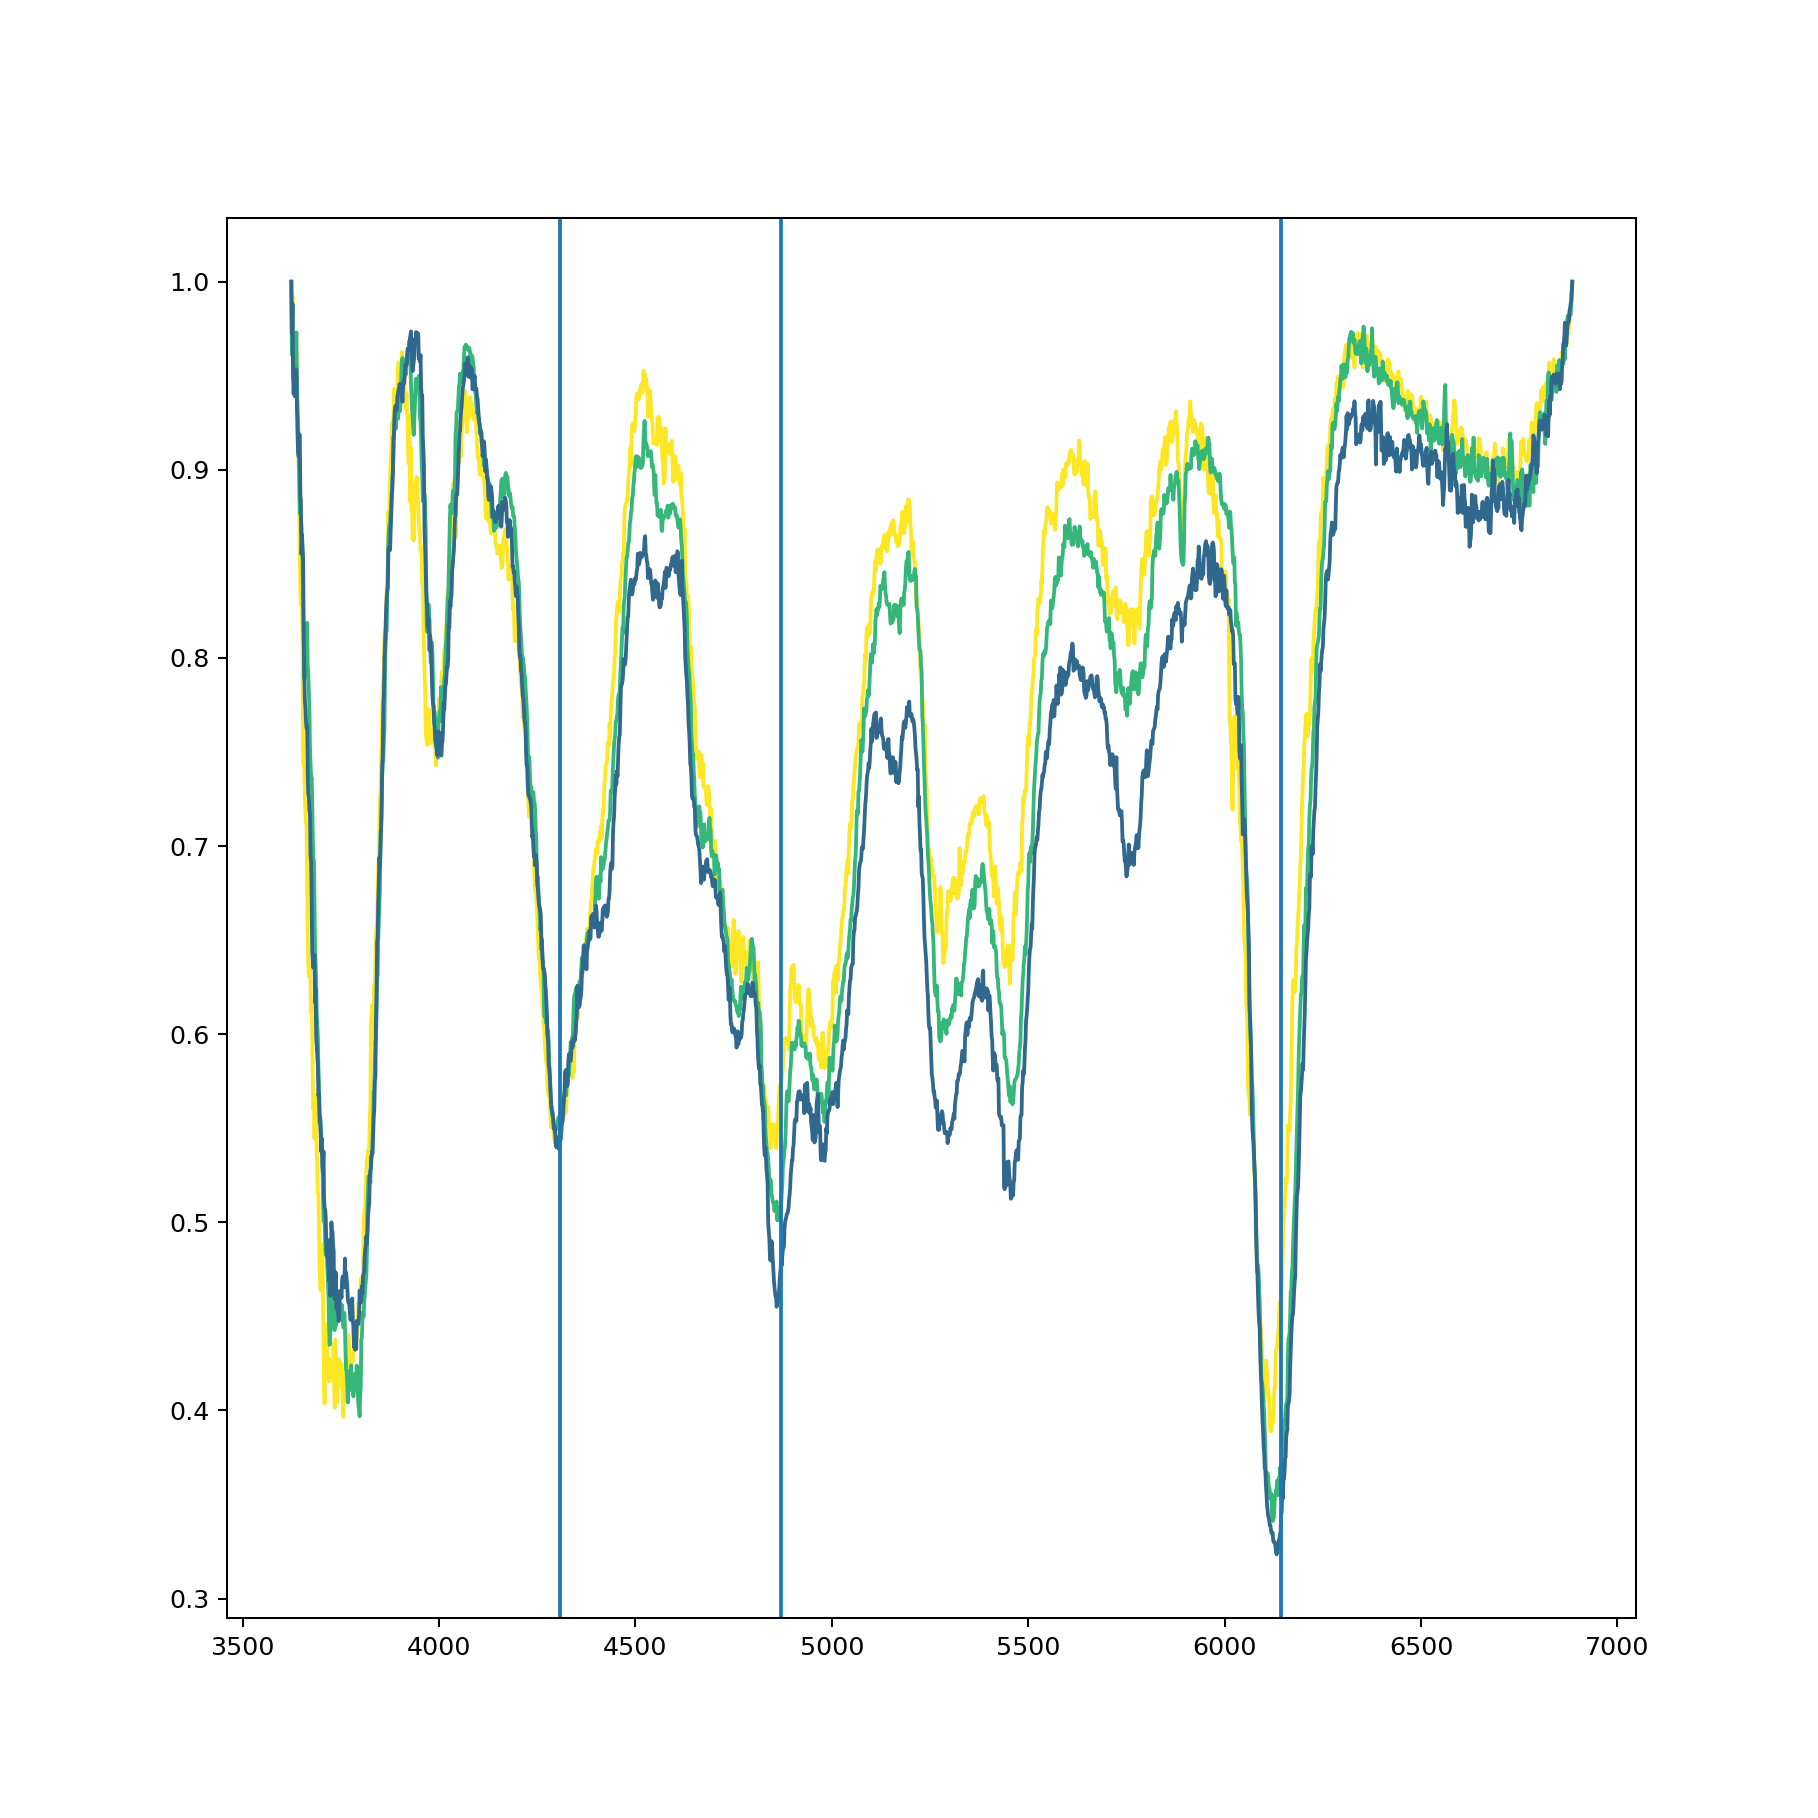

In [134]:
reload(specplotlib)
_ = specplotlib.ladder_plot_smooth(CW[:-k], X_SG_NORM, g4, x, nof_spectra = 3, delta = 0)

<IPython.core.display.Javascript object>


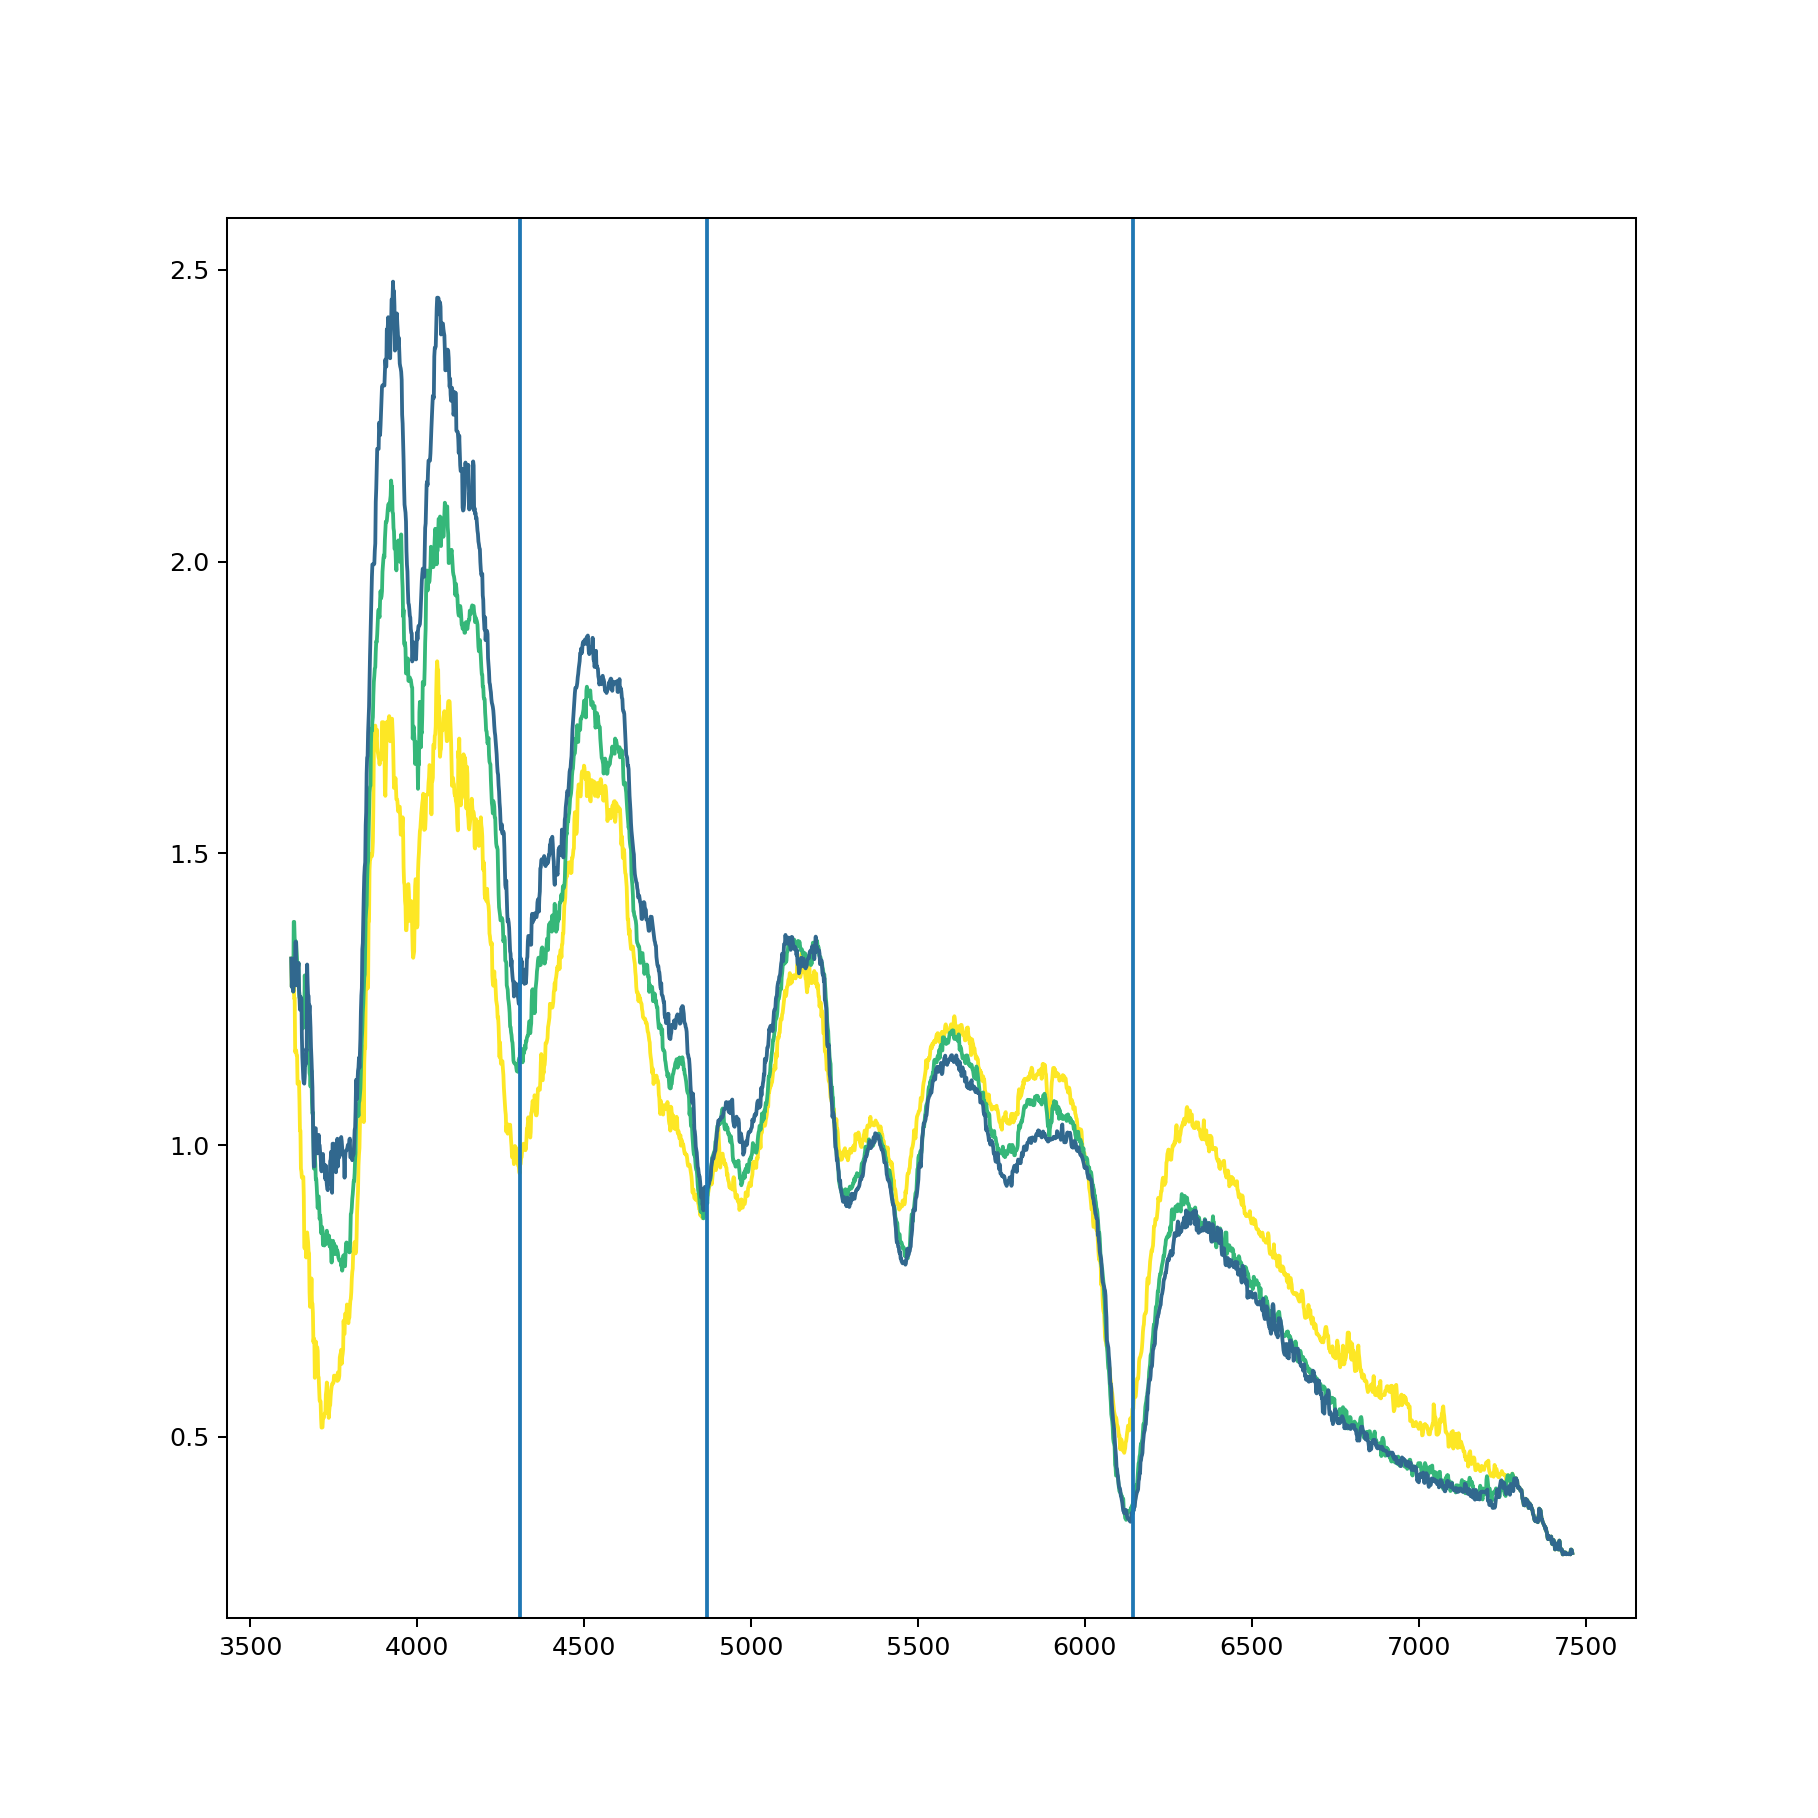

In [132]:
reload(specplotlib)
_ = specplotlib.ladder_plot_smooth(CW, X_SG, keep_inds[g4], x[g4], nof_spectra = 3, delta = 0)

<IPython.core.display.Javascript object>


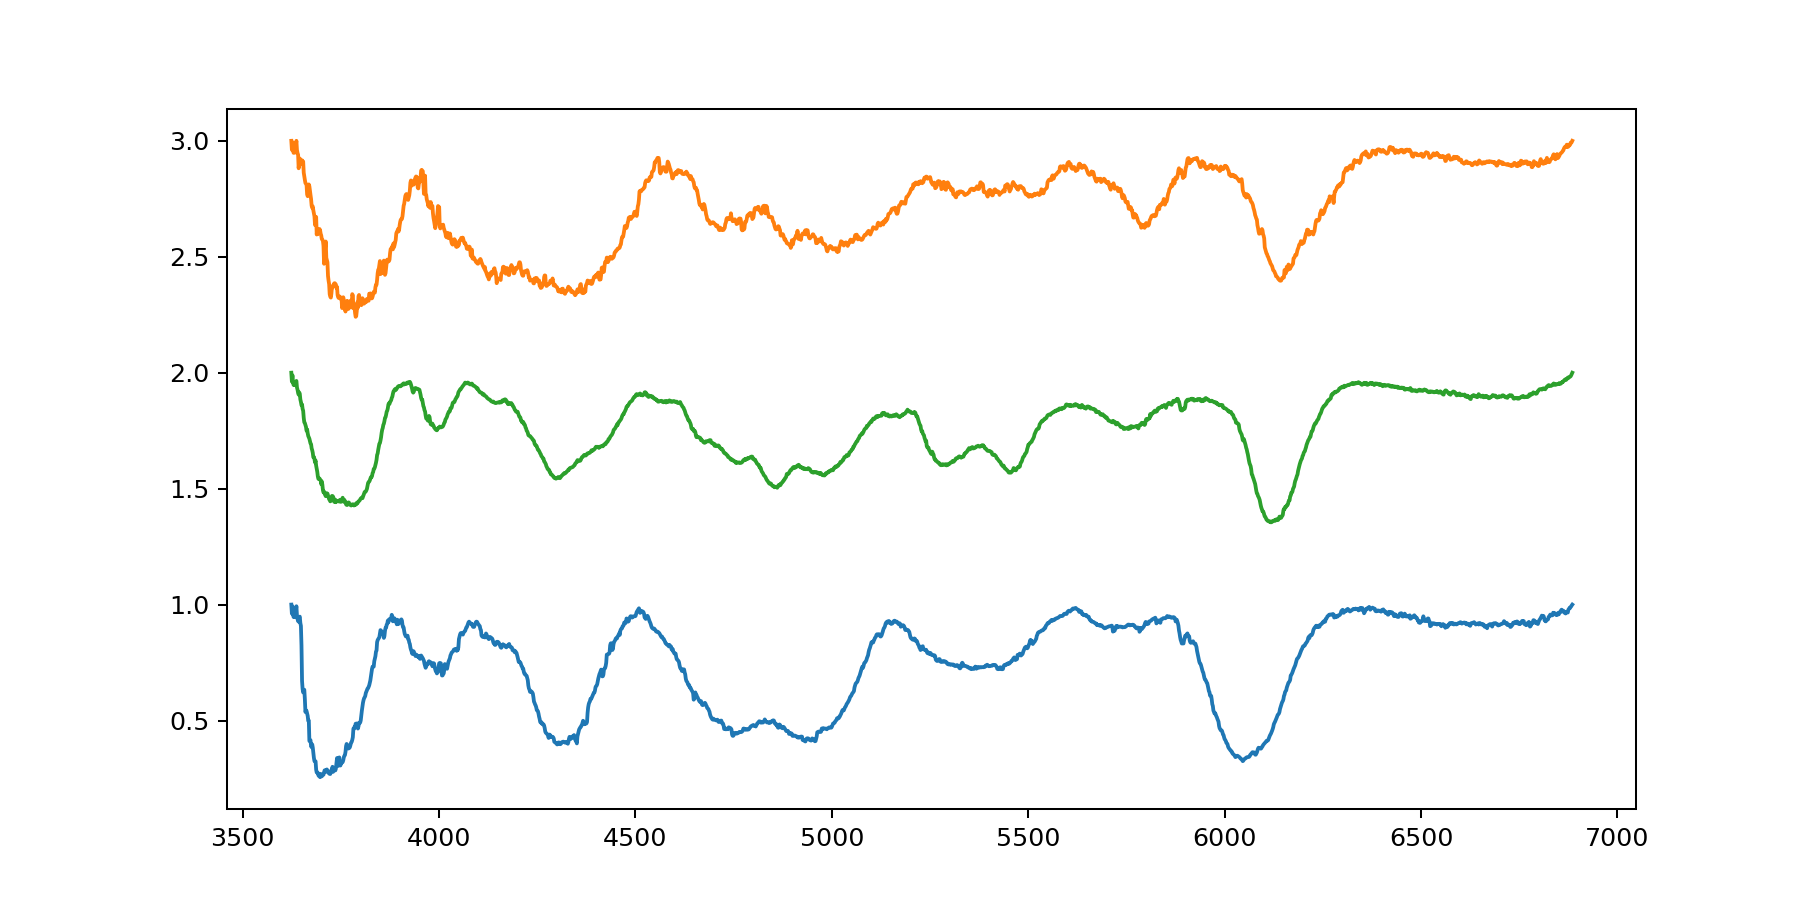

In [175]:
plt.figure(figsize = (10,5))
x_plt = numpy.nanmedian(X_SG_NORM[g1], axis = 0)
plt.plot(CW[:-k],x_plt)
x_plt = numpy.nanmedian(X_SG_NORM[g2], axis = 0)
plt.plot(CW[:-k],x_plt+2)
x_plt = numpy.nanmedian(X_SG_NORM[g4], axis = 0)
plt.plot(CW[:-k],x_plt+1)
x_plt = numpy.nanmedian(X_SG_NORM[g3], axis = 0)
#plt.plot(x_plt)
plt.show()

<IPython.core.display.Javascript object>


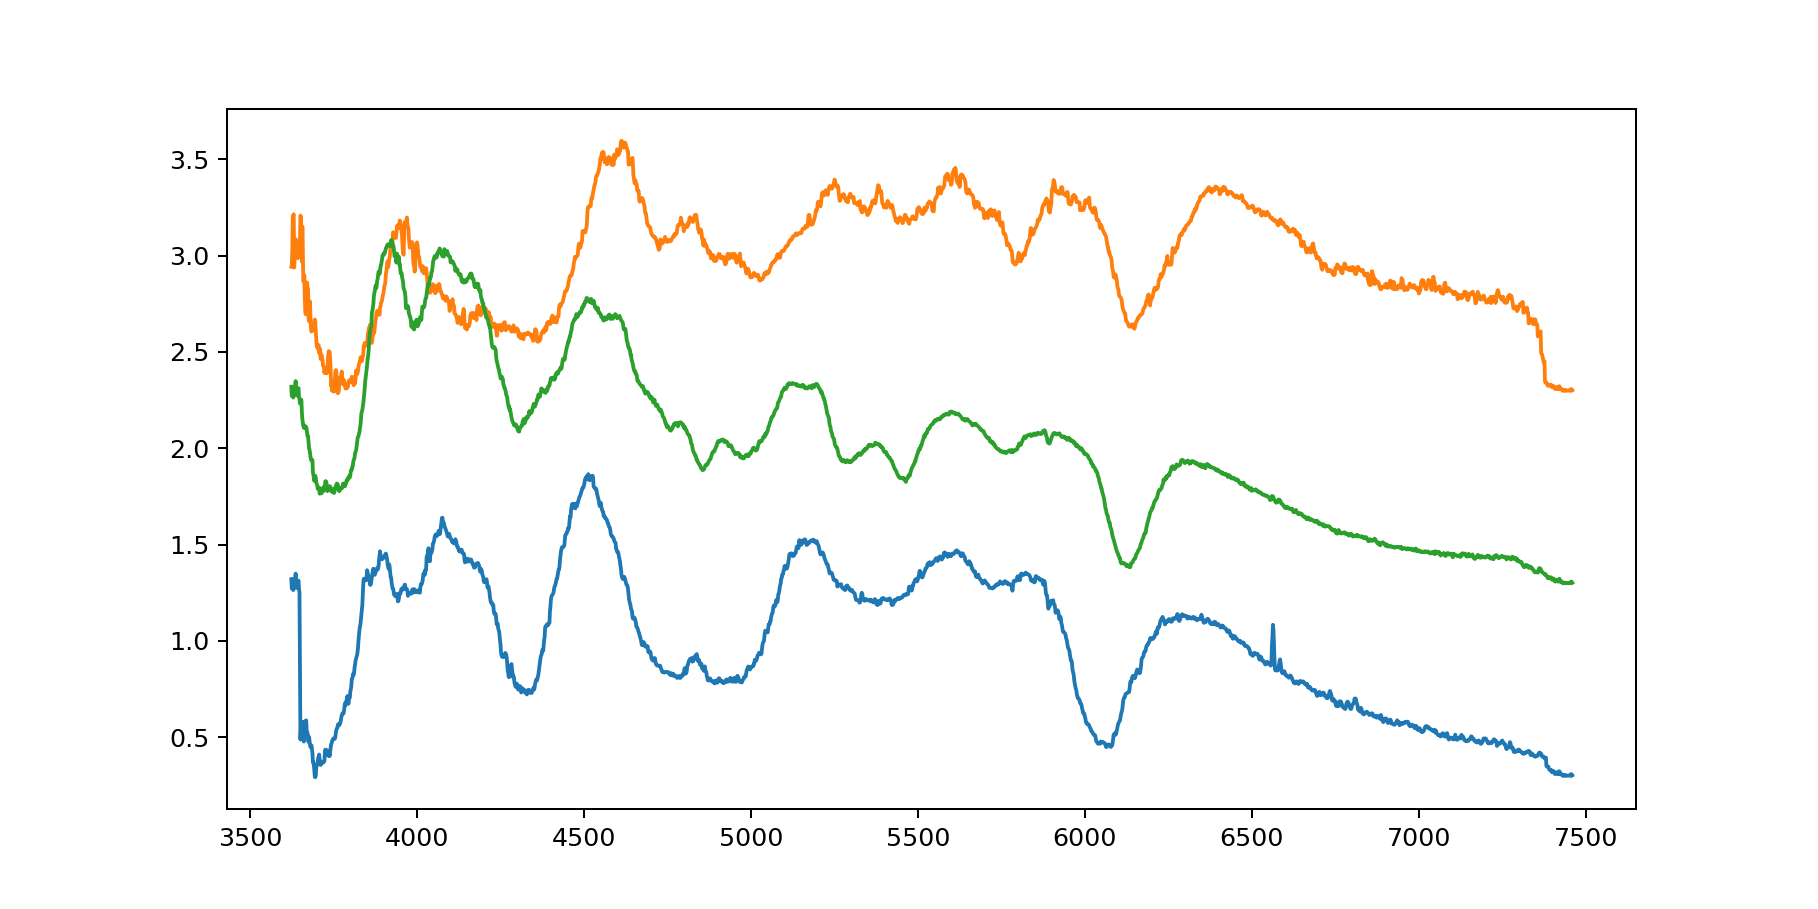

In [176]:
plt.figure(figsize = (10,5))
x_plt = numpy.nanmedian(X_SG[keep_inds[g1]], axis = 0)
plt.plot(CW,x_plt)
x_plt = numpy.nanmedian(X_SG[keep_inds[g2]], axis = 0)
plt.plot(CW,x_plt+2)
x_plt = numpy.nanmedian(X_SG[keep_inds[g4]], axis = 0)
plt.plot(CW,x_plt+1)
x_plt = numpy.nanmedian(X_SG[keep_inds[g3]], axis = 0)
#plt.plot(CW,x_plt)
plt.show()

In [ ]:
plt.figure(figsize = (7,5))
x_plt = numpy.nanmedian(X_SG[keep_inds[g1]], axis = 0)
plt.plot(CW,x_plt)
x_plt = numpy.nanmedian(X_SG[keep_inds[g2]], axis = 0)
plt.plot(CW,x_plt)
plt.show()

<IPython.core.display.Javascript object>


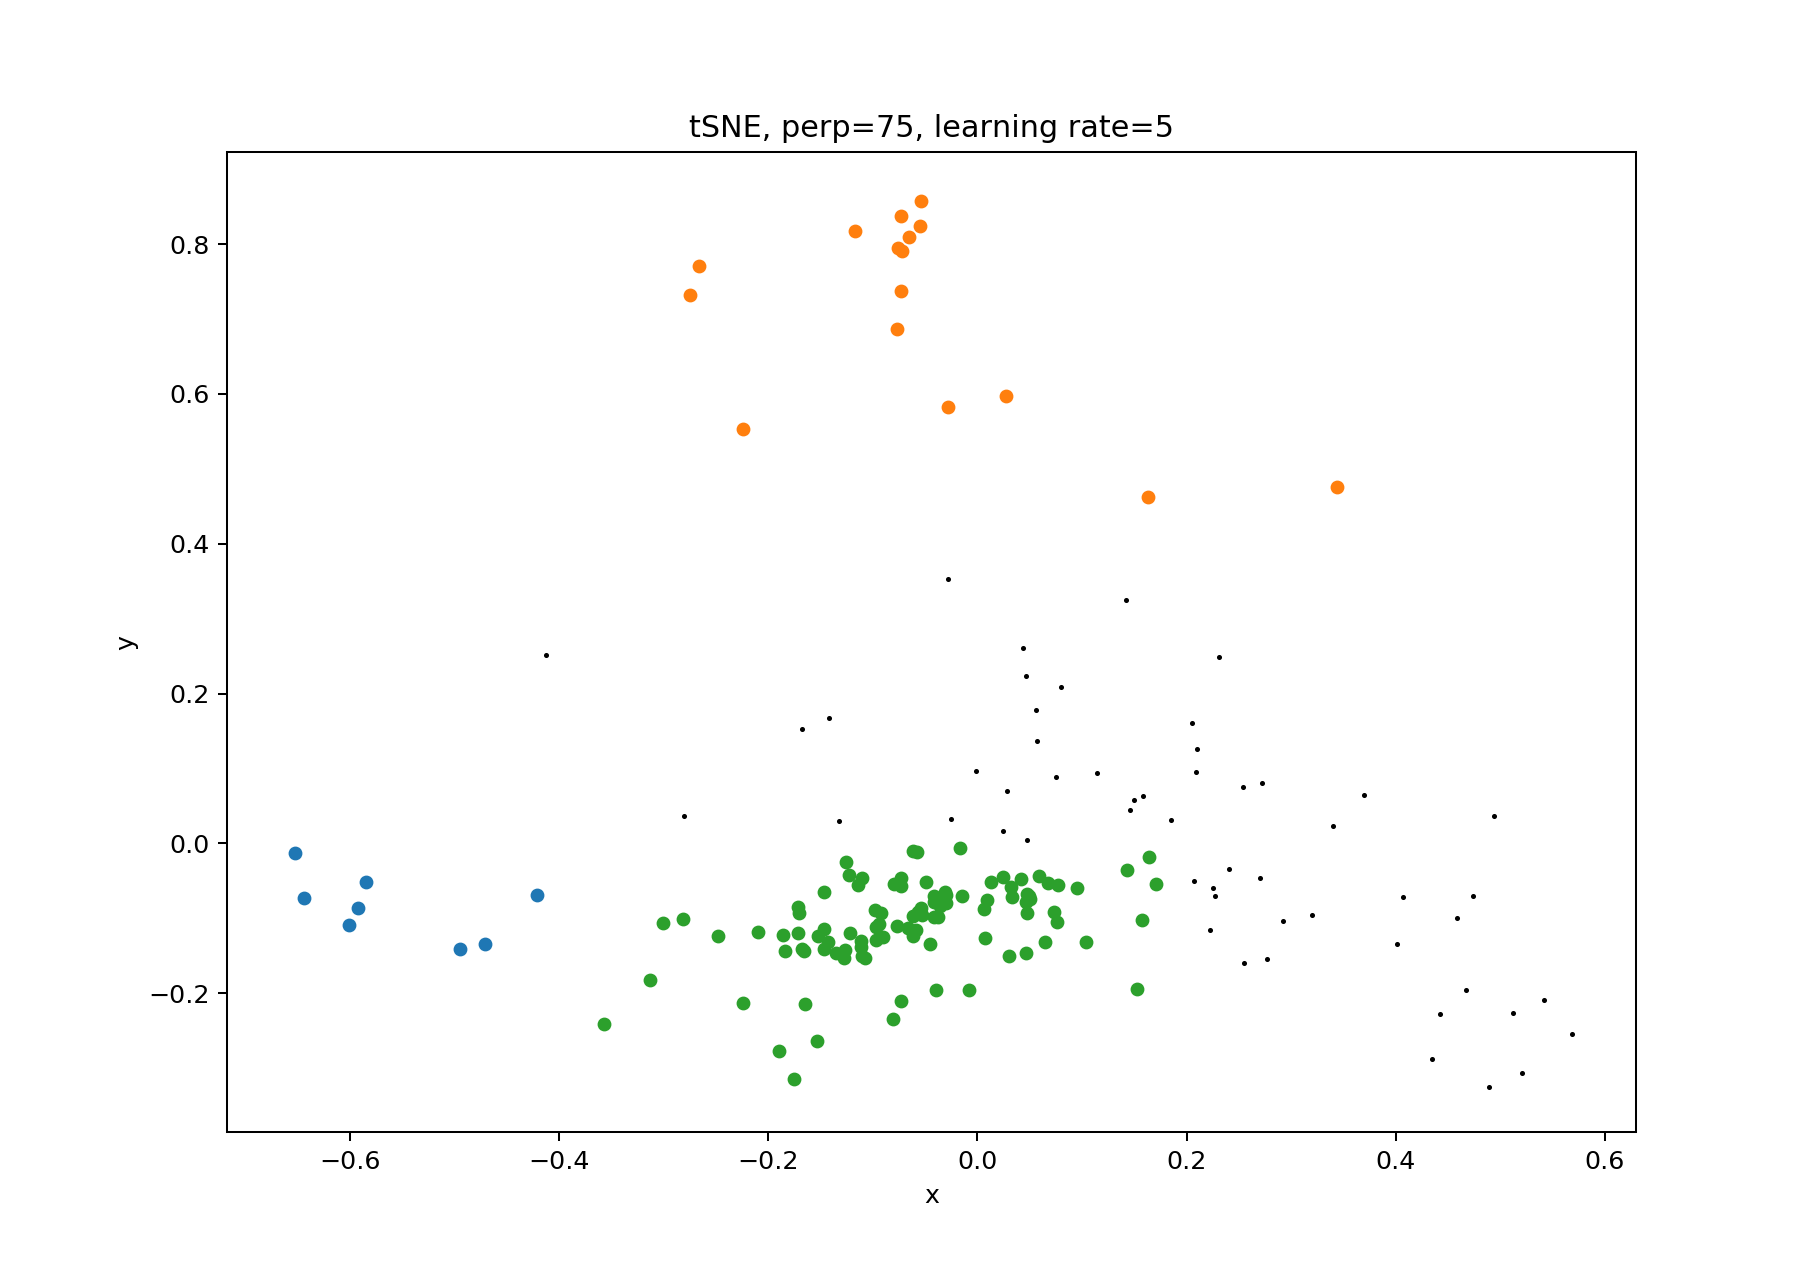

In [135]:
# now run the same analysis for different values of perplexity and learning rate
from sklearn.manifold import TSNE

prep_list = [75] #how many "nearest neighbors" to consider 
learning_rate = [5] #which gap to take between calculations of minima (resolution)
plt.figure(figsize = (10,7))
#plt.rcParams['figure.figsize'] = 10,7

count = 1
for p, prep_val in enumerate(prep_list):
    for l, learn_val in enumerate(learning_rate):
        

        plt.subplot(1, 1, count)
        plt.title("tSNE, perp=%s, learning rate=%s" % (prep_val, learn_val))
        plt.scatter(x, y, s=1, color = 'k')
        plt.scatter(x[g1], y[g1], s=20)
        plt.scatter(x[g2], y[g2], s=20)
        plt.scatter(x[g4], y[g4], s=20)
        
        plt.xlabel("x")
        plt.ylabel("y")
        
        count += 1
        
#plt.tight_layout()
plt.show()

In [116]:
keep_inds = numpy.array(keep_inds)

array([ 18,  52,  54,  70,  75,  99, 120, 138])

In [92]:
swc = X_SG[52]
snc = spectro.SpectrumConvexHullQuotient(list(swc), list(CW))

In [73]:
swc.max()

3.4149503087911008

In [93]:
snc_s = numpy.concatenate(snc.crs)
snc_s

array([ 1.        ,  0.96102489,  0.9942364 , ...,  0.99949322,
        1.        ,  1.        ])

<IPython.core.display.Javascript object>


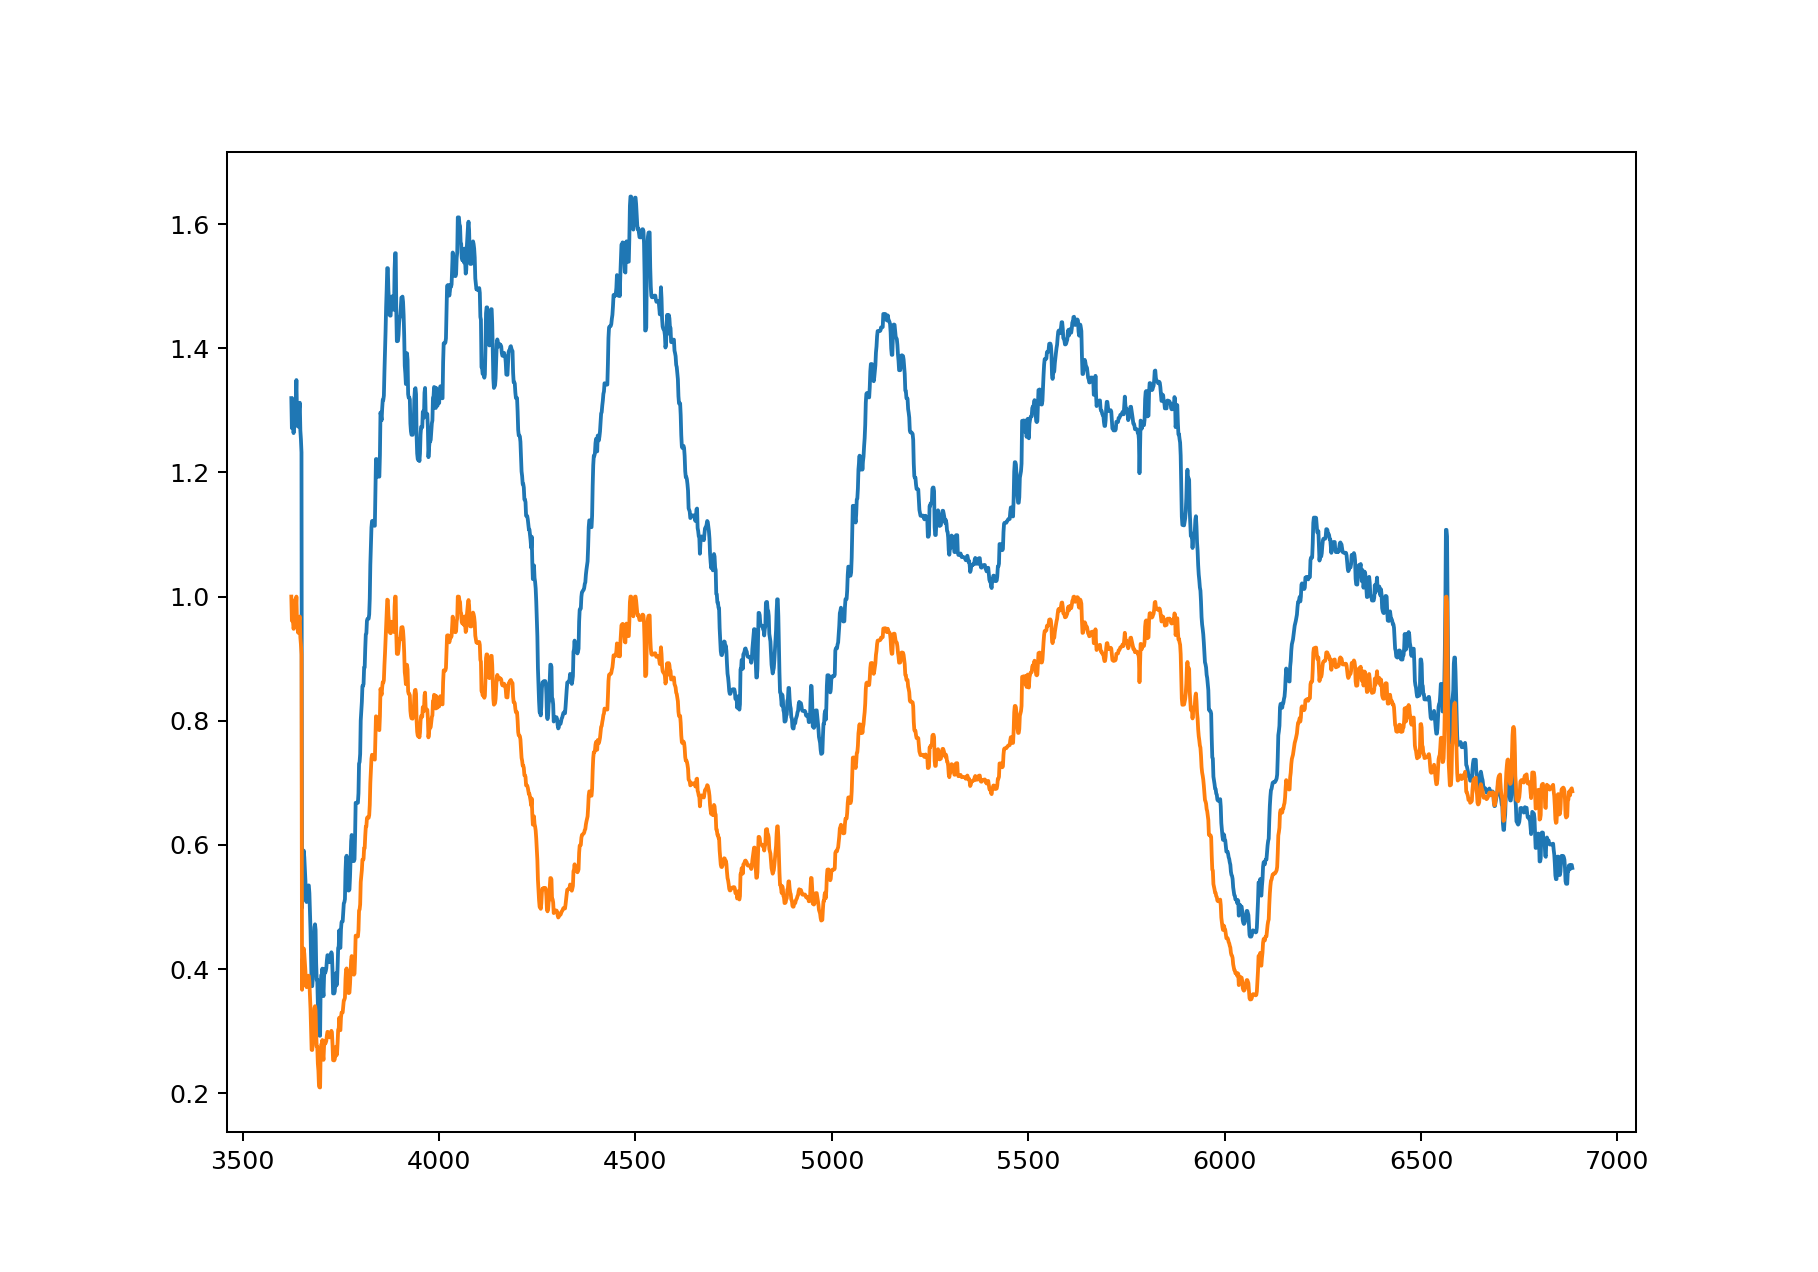

In [97]:
k = 400
plt.figure(figsize =(10,7))
plt.plot(CW[:-k],swc[:-k])
plt.plot(CW[:-k],snc_s[:-k])
plt.show()

In [188]:
SN_df.head()

zhel  tmax(B)  +/-       ref.  Dm15  +/-.1 ref..1    M_B  +/-.2  \
#SN                                                                         
1993ac  0.0503  49269.2  1.2      Jha07  1.19   0.10  Phi99 -99.99   9.99   
1993ae  0.0190  99999.9  9.9        NaN  9.99   9.99    NaN -99.99   9.99   
1994D   0.0029  49432.5  0.1  B,M,SA,SN  1.37   0.03      B -99.99   9.99   
1994M   0.0232  49474.5  0.9  B,M,SA,SN  1.26   0.06      B -19.21   0.08   
1994Q   0.0295  49496.2  1.1      Jha07  1.03   0.10  Phi99 -99.99   9.99   

         B-V  +/-.3  Bm-Vm  +/-.4  Phot.  ref..2  n_spec  
#SN                                                       
1993ac -9.99   9.99  -9.99   9.99   CfA1     NaN     2.0  
1993ae -9.99   9.99  -9.99   9.99   CfA1     NaN     1.0  
1994D  -9.99   9.99  -9.99   9.99  Jha07     NaN    26.0  
1994M  -0.11   0.06  -0.10   0.06   CfA1     NaN     9.0  
1994Q  -9.99   9.99  -9.99   9.99   CfA1     NaN     4.0

In [294]:
g1n

array(['1994D', '1994S', '1994ae', '1995E', '1995ac', '1996C', '1996X',
       '1997E', '1997Y', '1998V', '1998aq', '1998bu', '1998dh', '1998ec',
       '1998ef', '1998eg', '1998es', '1999aa', '1999cc', '1999dq',
       '1999ej', '1999gd', '1999gp', '2000cp', '2000cx', '2000dm',
       '2000dn', '2000fa', '2001G', '2001V', '2001ay', '2001bf', '2001bg',
       '2001br', '2001ck', '2001cp', '2001da', '2001eh', '2001en',
       '2001fe', '2002G', '2002aw', '2002bf', '2002bo', '2002ck', '2002cs',
       '2002cu', '2002de', '2002do', '2002dp', '2002ef', '2002fk',
       '2002ha', '2002he', '2002jy', '2002kf', '2003du', '2003ic',
       '2003it', '2003kf', '2004L', '2004as', '2004at', '2004ef', '2004fu',
       '2005am', '2005cf', '2005el', '2005eq', '2005ki', '2005mc',
       '2005na', '2006N', '2006al', '2006cf', '2006cj', '2006cm', '2006cq',
       '2006cz', '2006et', '2006le', '2006lf', '2006nz', '2006ot',
       '2006sr', '2007A', '2007F', '2007S', '2007bd', '2007ci', '2007co',
       '

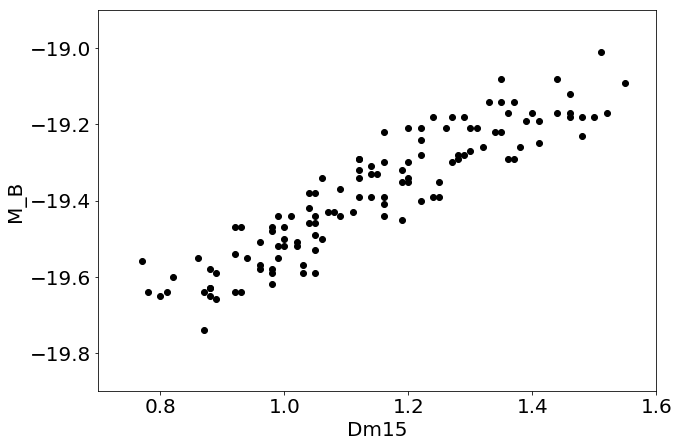

In [209]:
plt.figure(figsize = (10,7))
plt.scatter(SN_df['Dm15'], SN_df['M_B'], color = 'k')
#g1n = numpy.array(sn_name)[keep_inds[g4]]
#plt.scatter(SN_df['Dm15'].loc[g1n], SN_df['M_B'].loc[g1n])
#plt.scatter(SN_df['Dm15'].loc[g1n], SN_df['M_B'].loc[g1n])
#plt.scatter(SN_df['Dm15'].loc[g1n], SN_df['M_B'].loc[g1n])

plt.xlim([0.7,1.6])
plt.ylim([-19.9,-18.9])
plt.xlabel('Dm15', fontsize = 20)
plt.ylabel('M_B', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.show()

In [345]:
X_SG.shape

(190, 2671)

In [346]:
X_SG_NORM.shape

(177, 2271)